#**How to Train YOLO11 Object Detection Model on a Custom Dataset**

In [2]:
!nvidia-smi

Thu Nov 28 16:08:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P0              44W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

**Step 01 # Install the Ultralytics Package**

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 17.2 MB/s eta 0:00:00


**Step 02 # Import All the Requried Libraries**

In [4]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 32.6/235.7 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LHmgZNvTRxU0wRN29PVM")
project = rf.workspace("anaworkspace").project("fire_smoke_detection-bqivj")
version = project.version(1)
dataset = version.download("yolov11")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fire_Smoke_Detection-1 in yolov11:: 100%|██████████| 19808/19808 [00:03<00:00, 6068.76it/s]


In [7]:
dataset.location

'/content/Fire_Smoke_Detection-1'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [8]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=100 imgsz=640 batch=256


100% 5.35M/5.35M [00:00<00:00, 67.0MB/s]
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Fire_Smoke_Detection-1/data.yaml, epochs=100, time=None, patience=100, batch=256, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_co

**Step # 05 Examine Training Results**

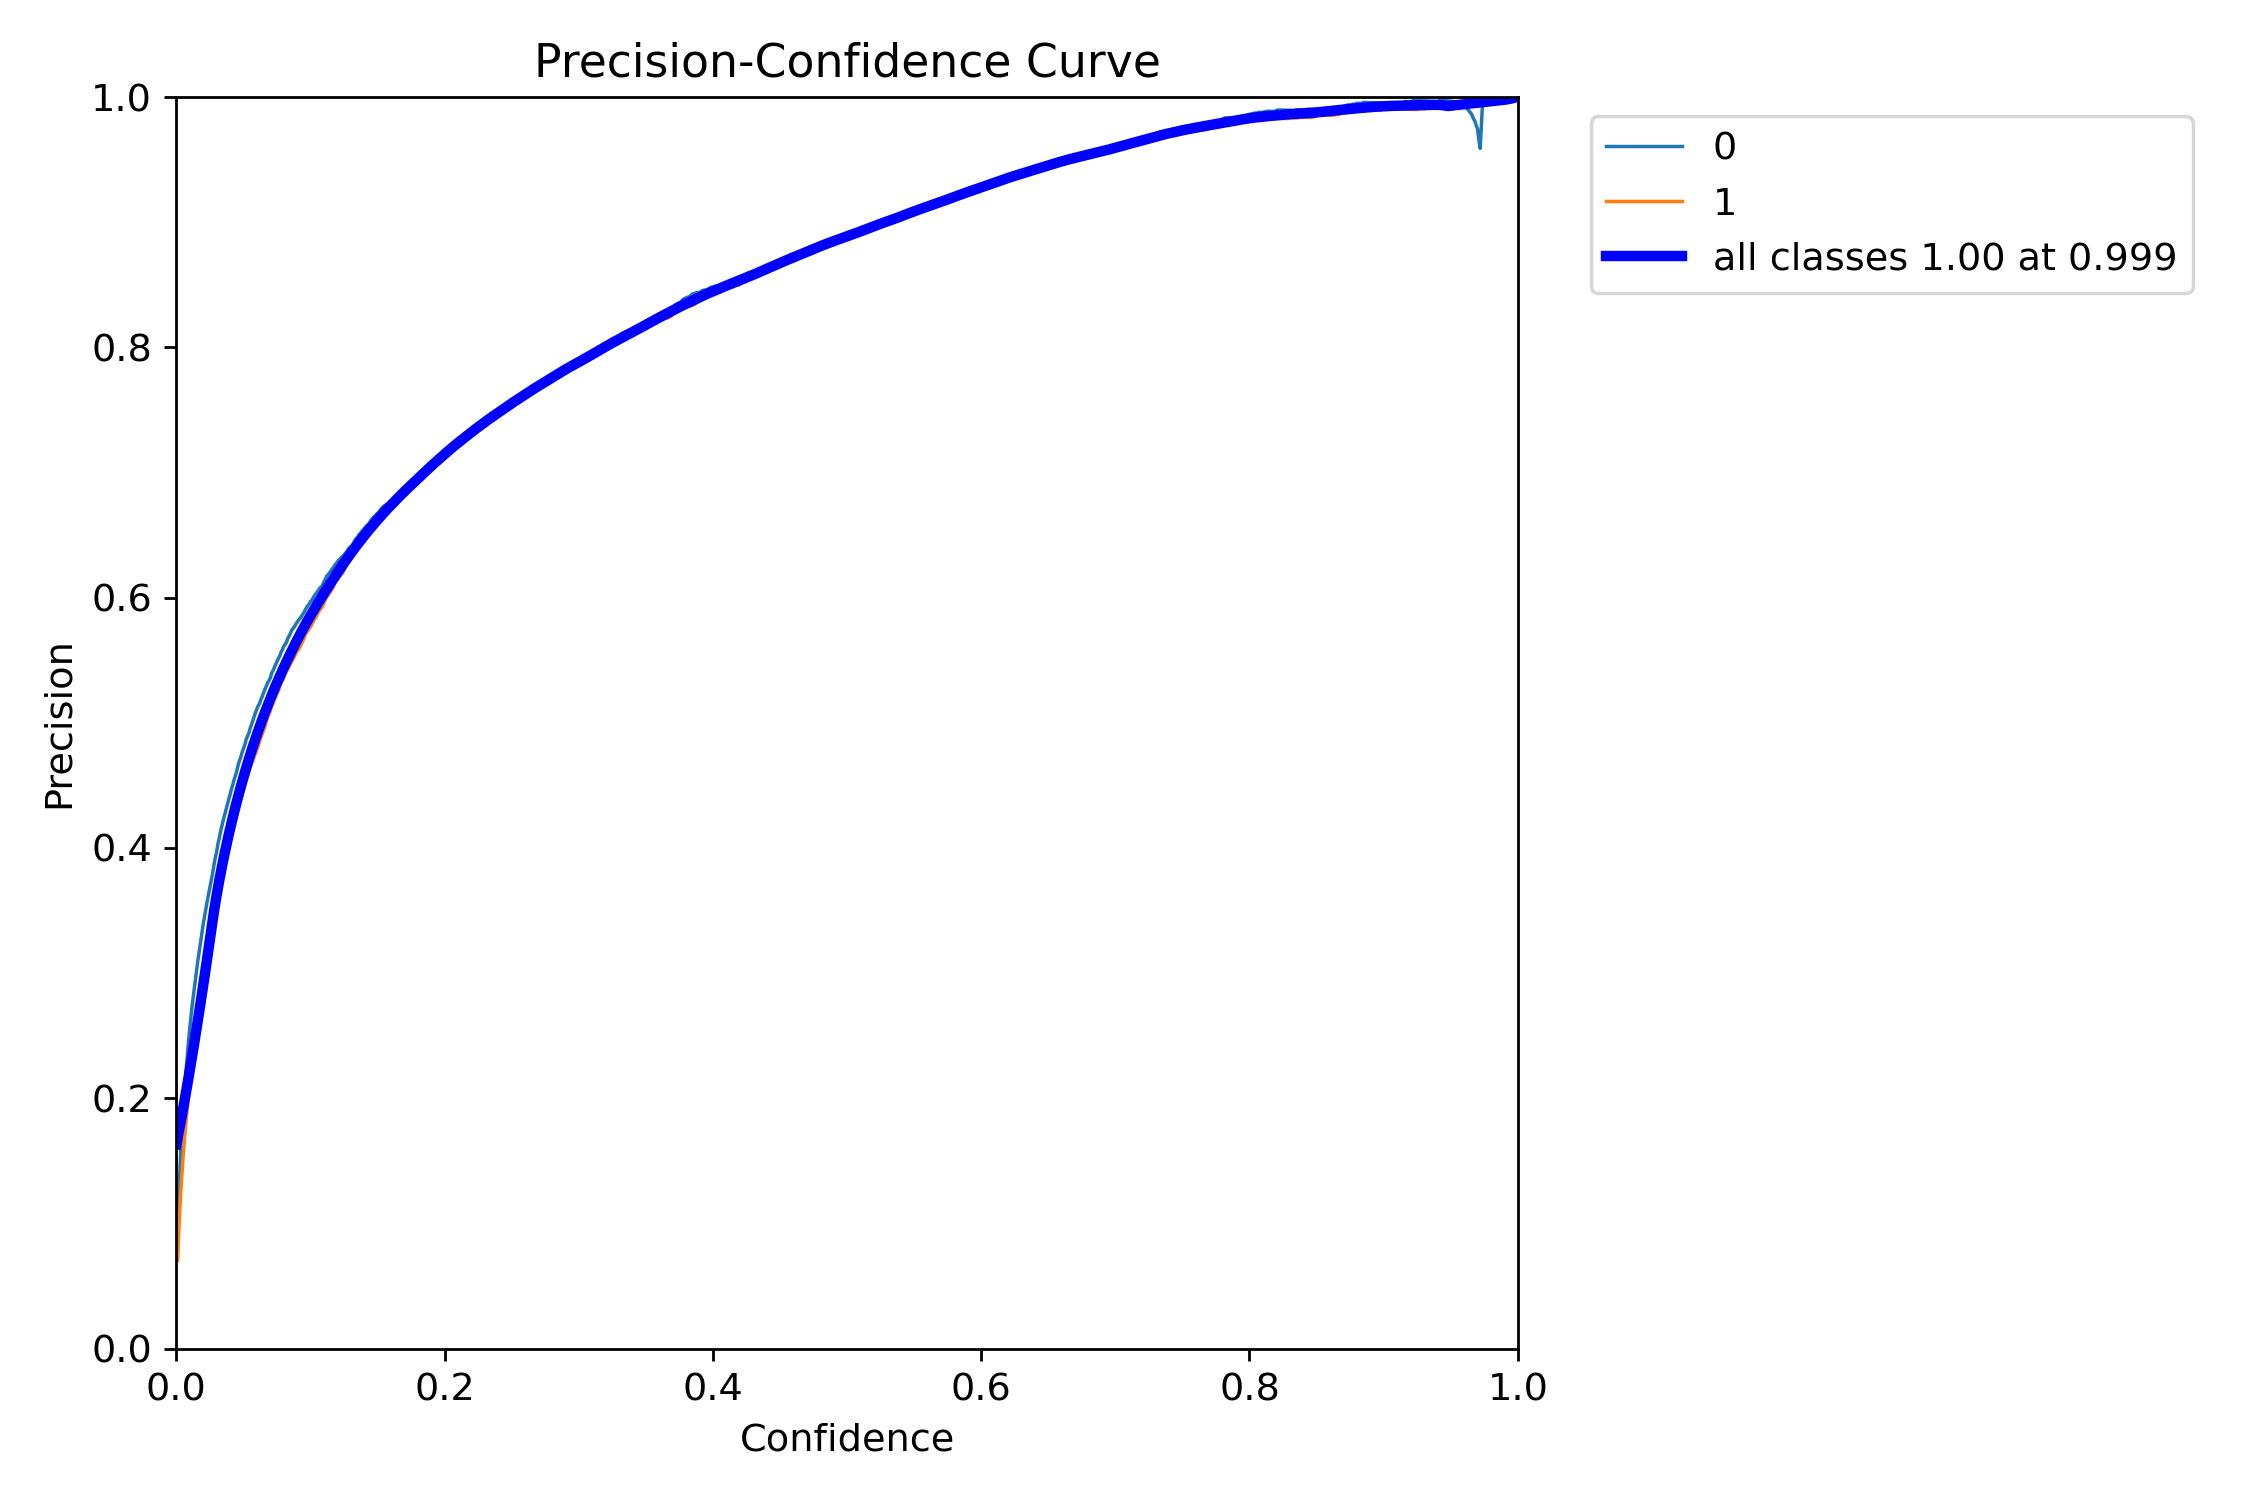

In [10]:
Image("/content/runs/detect/train/P_curve.png", width=700)

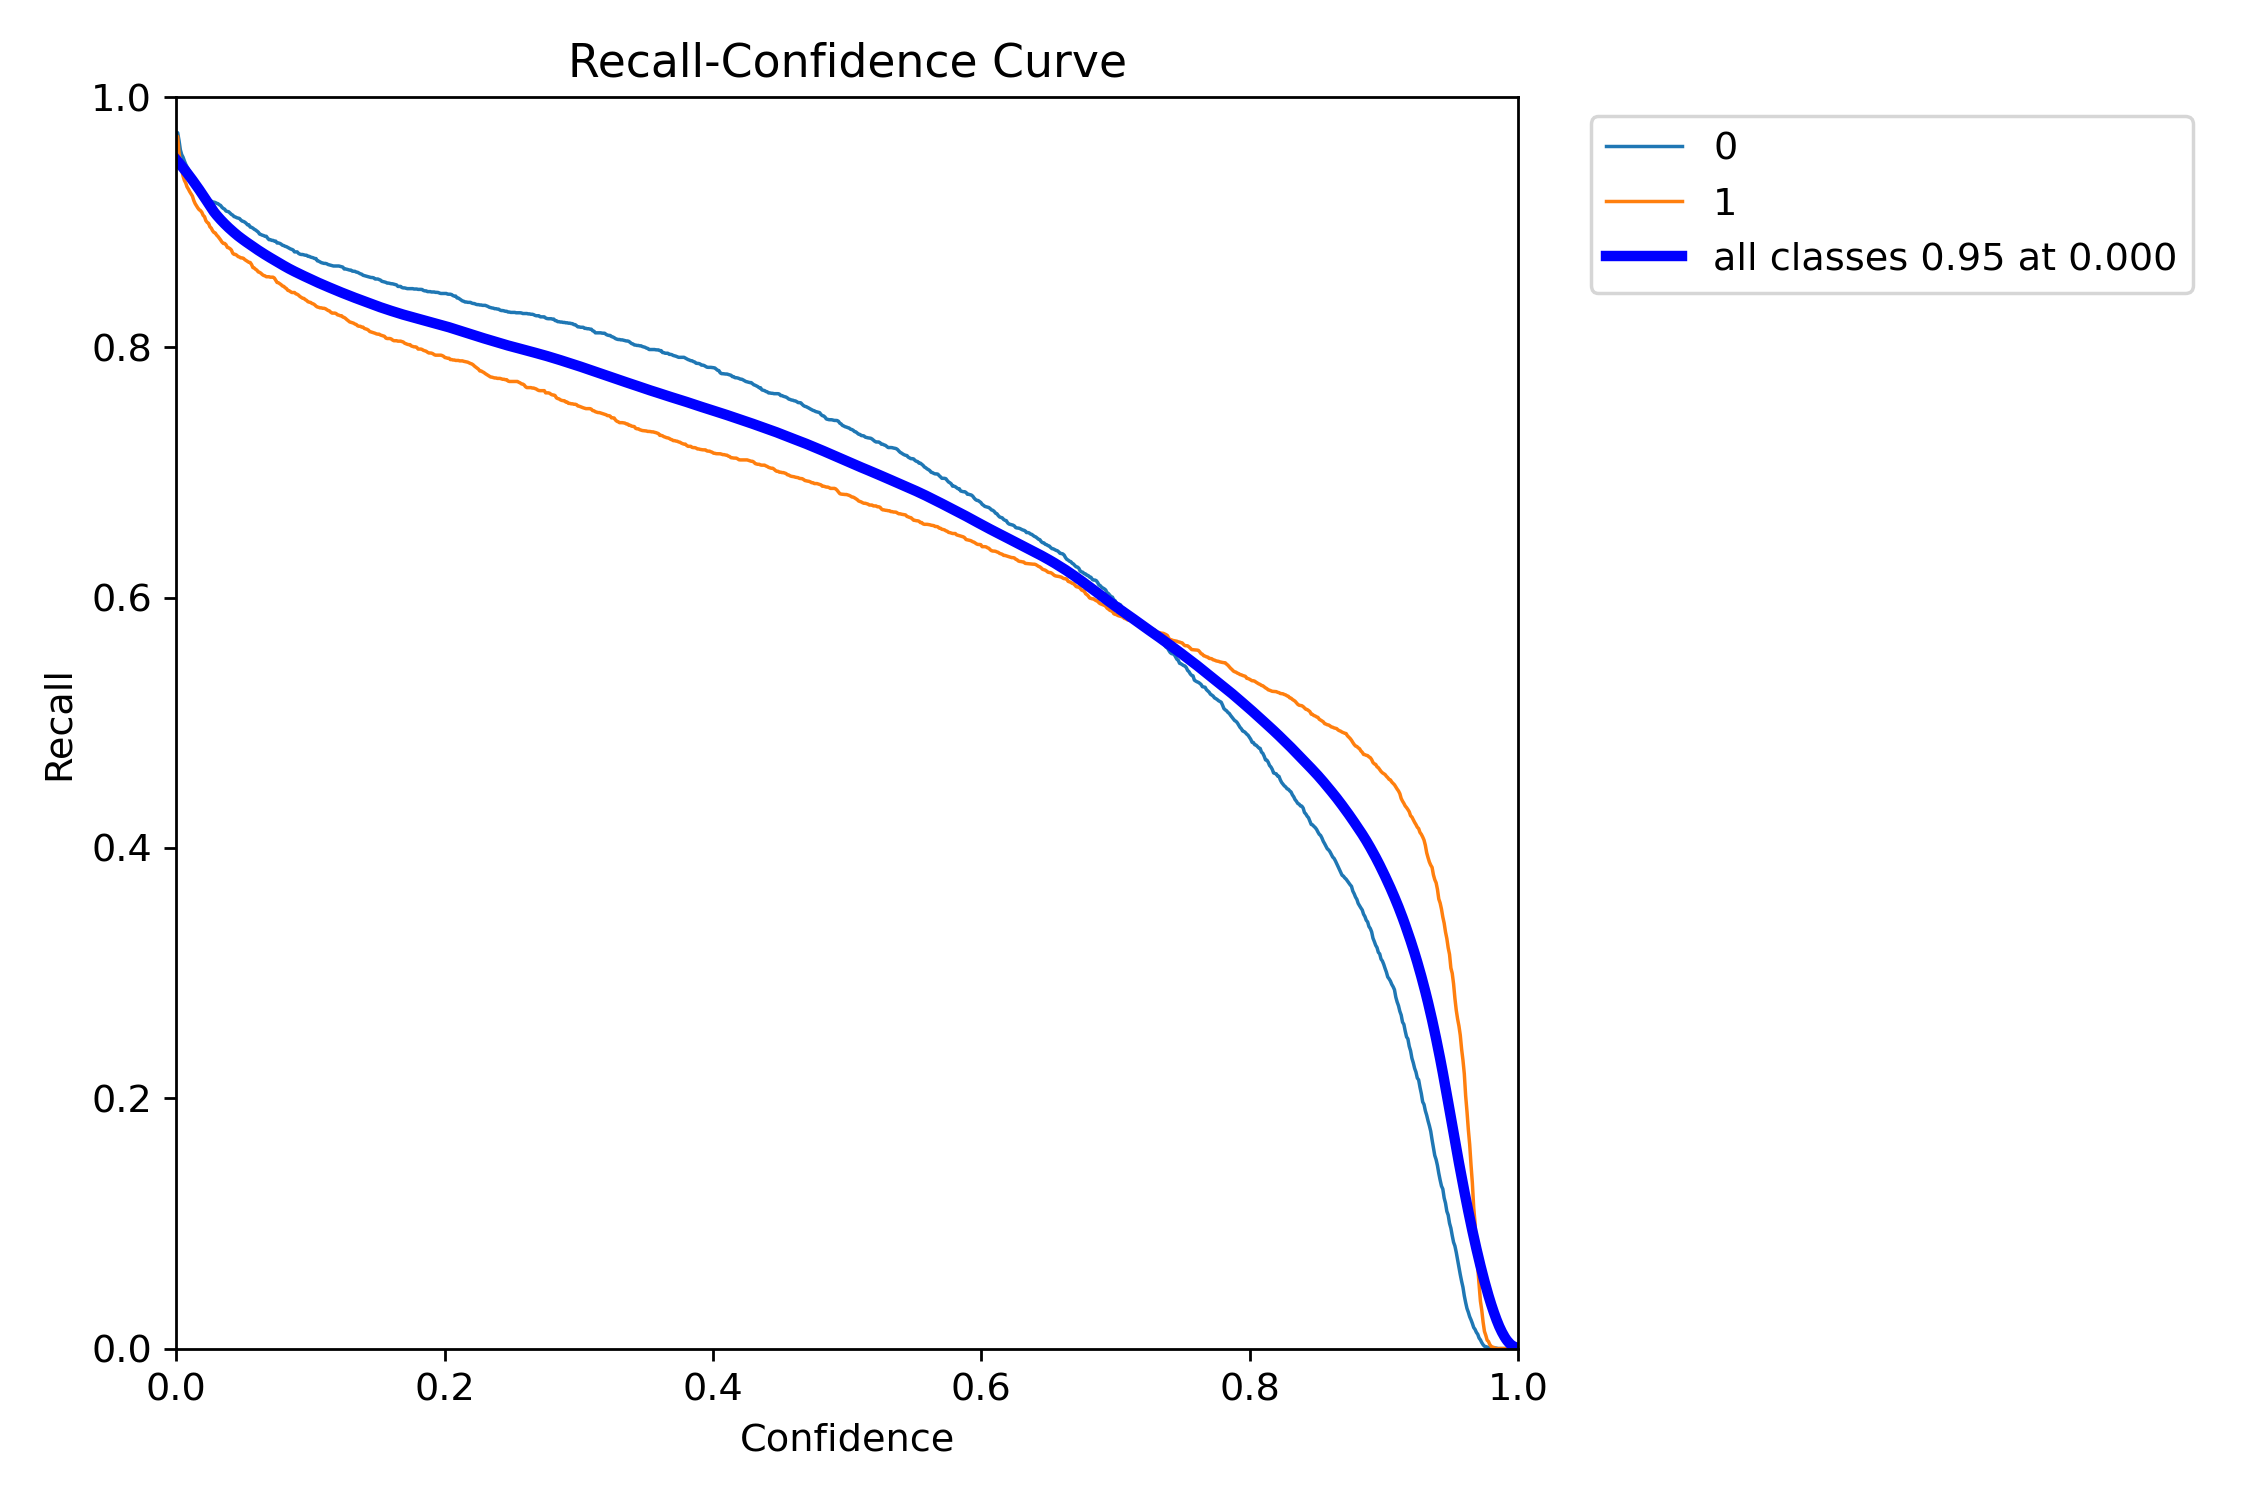

In [11]:
Image("/content/runs/detect/train/R_curve.png", width=700)

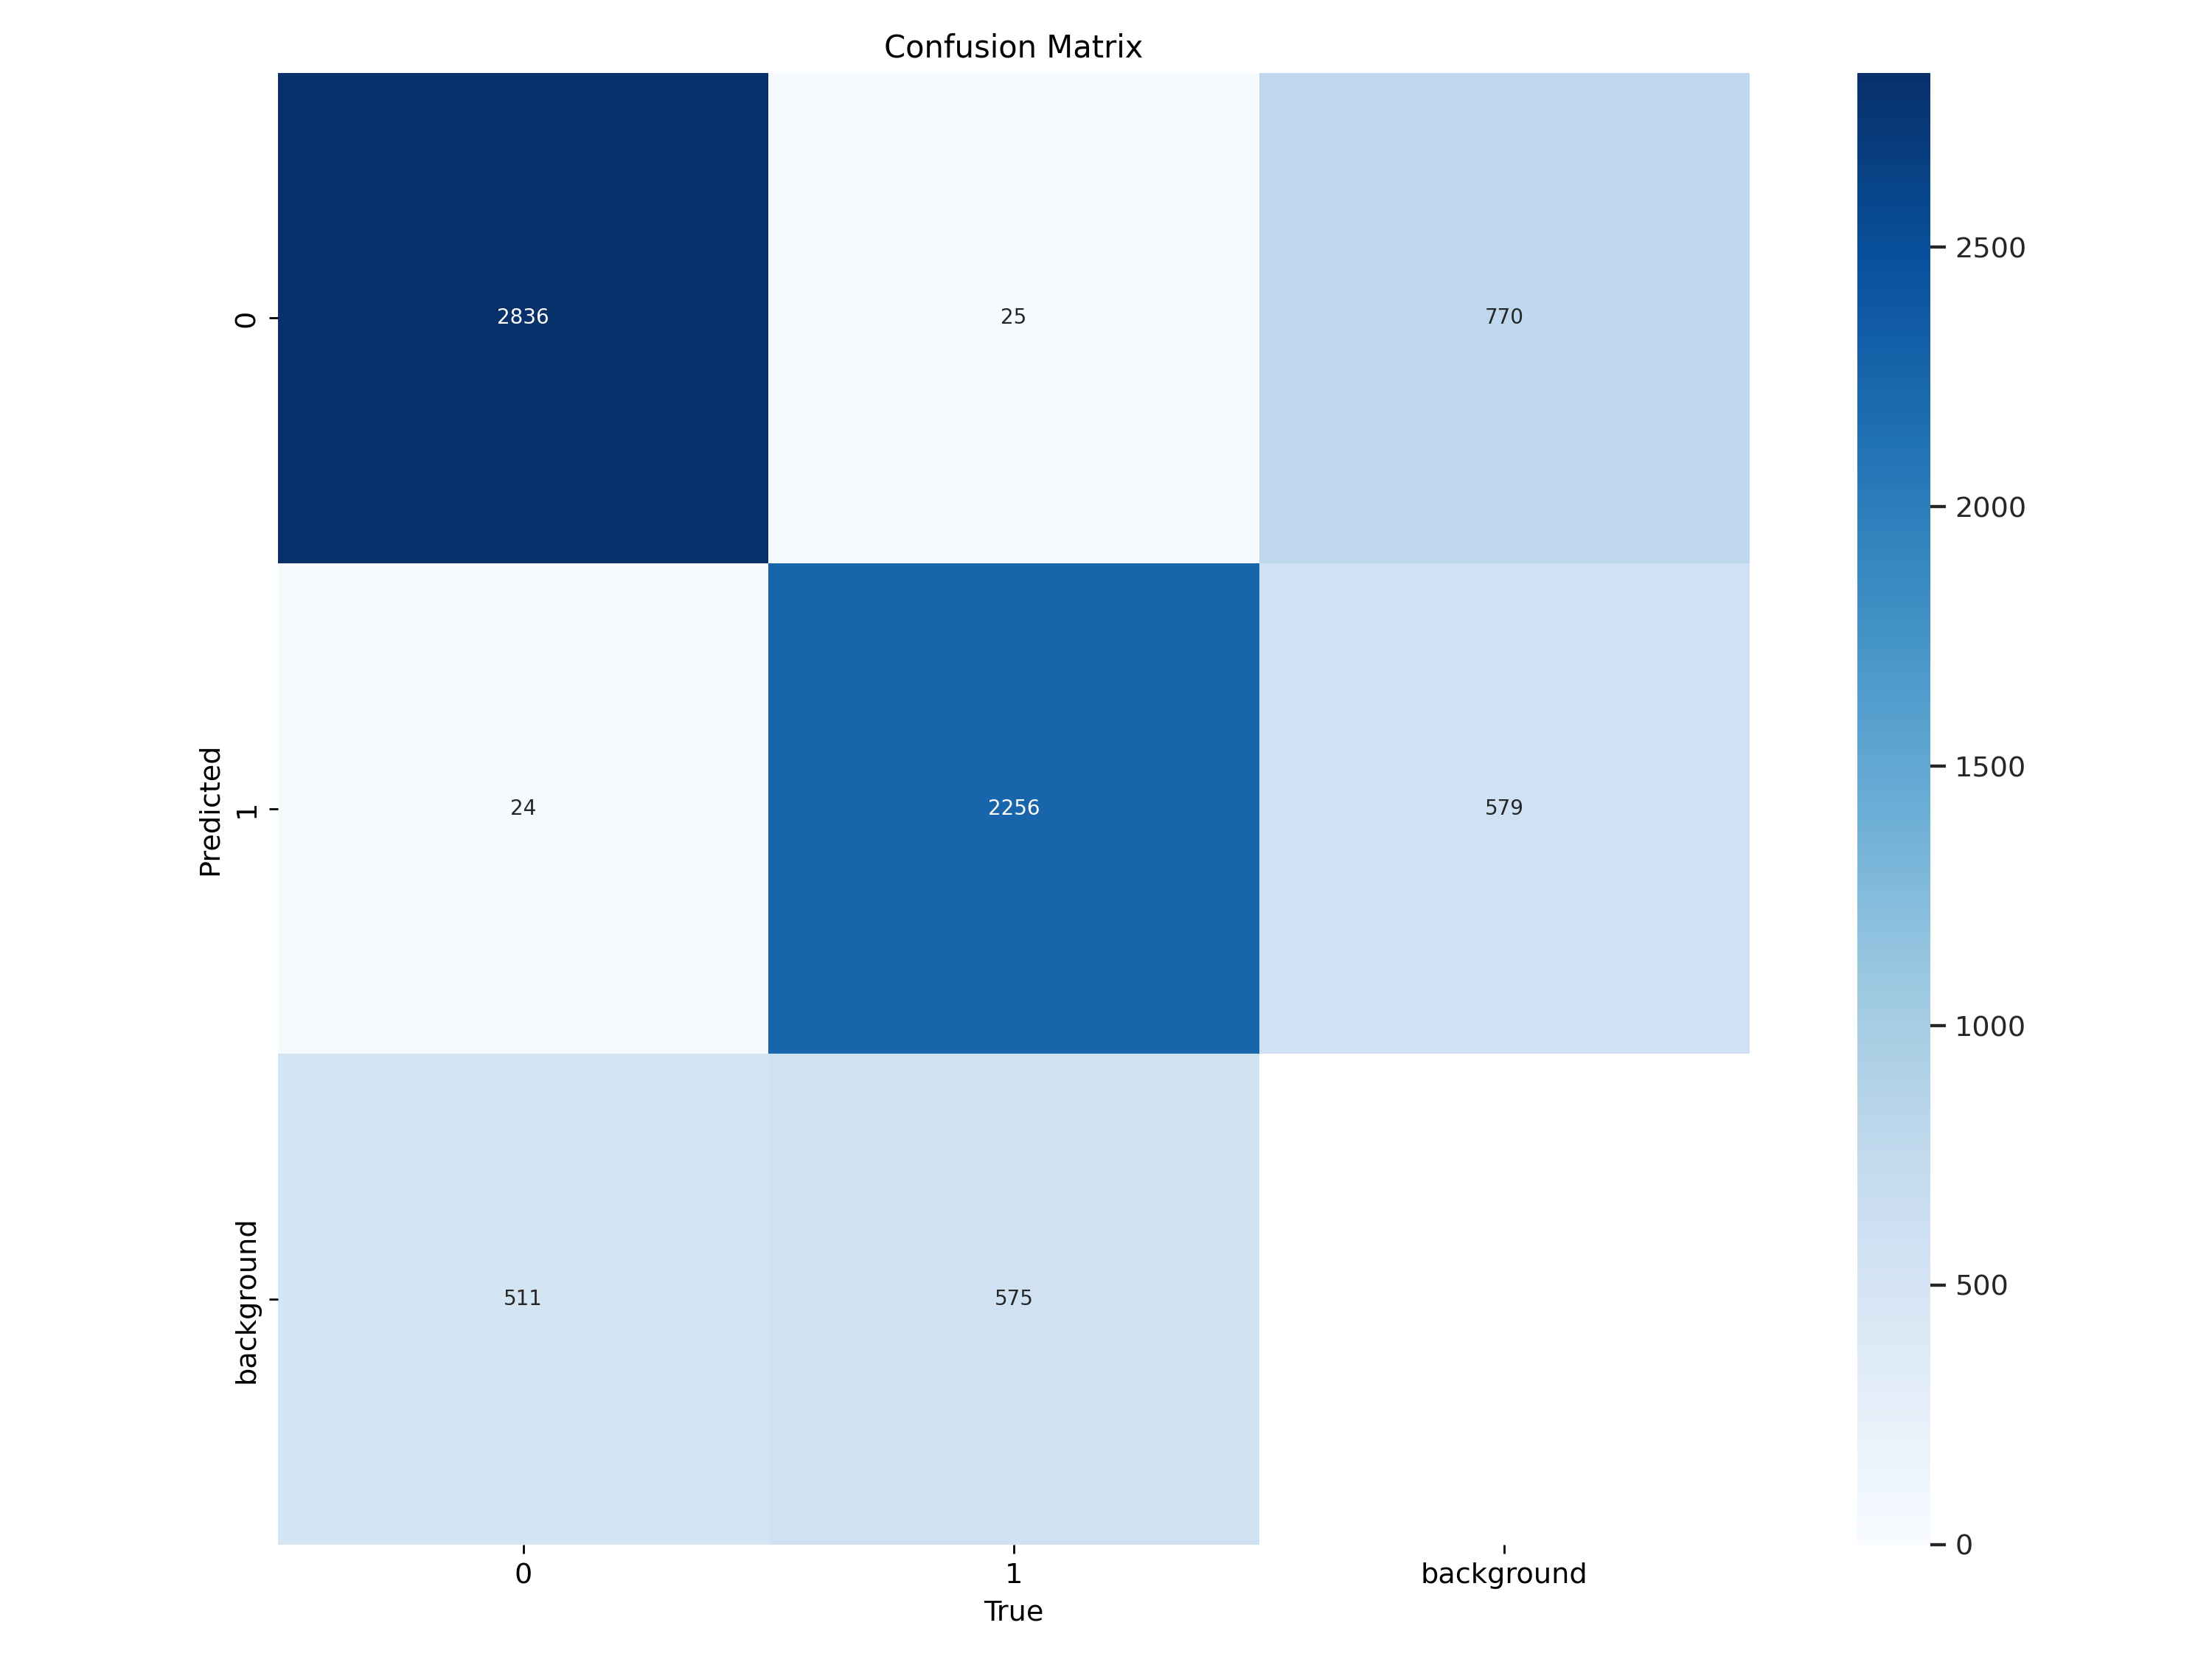

In [12]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

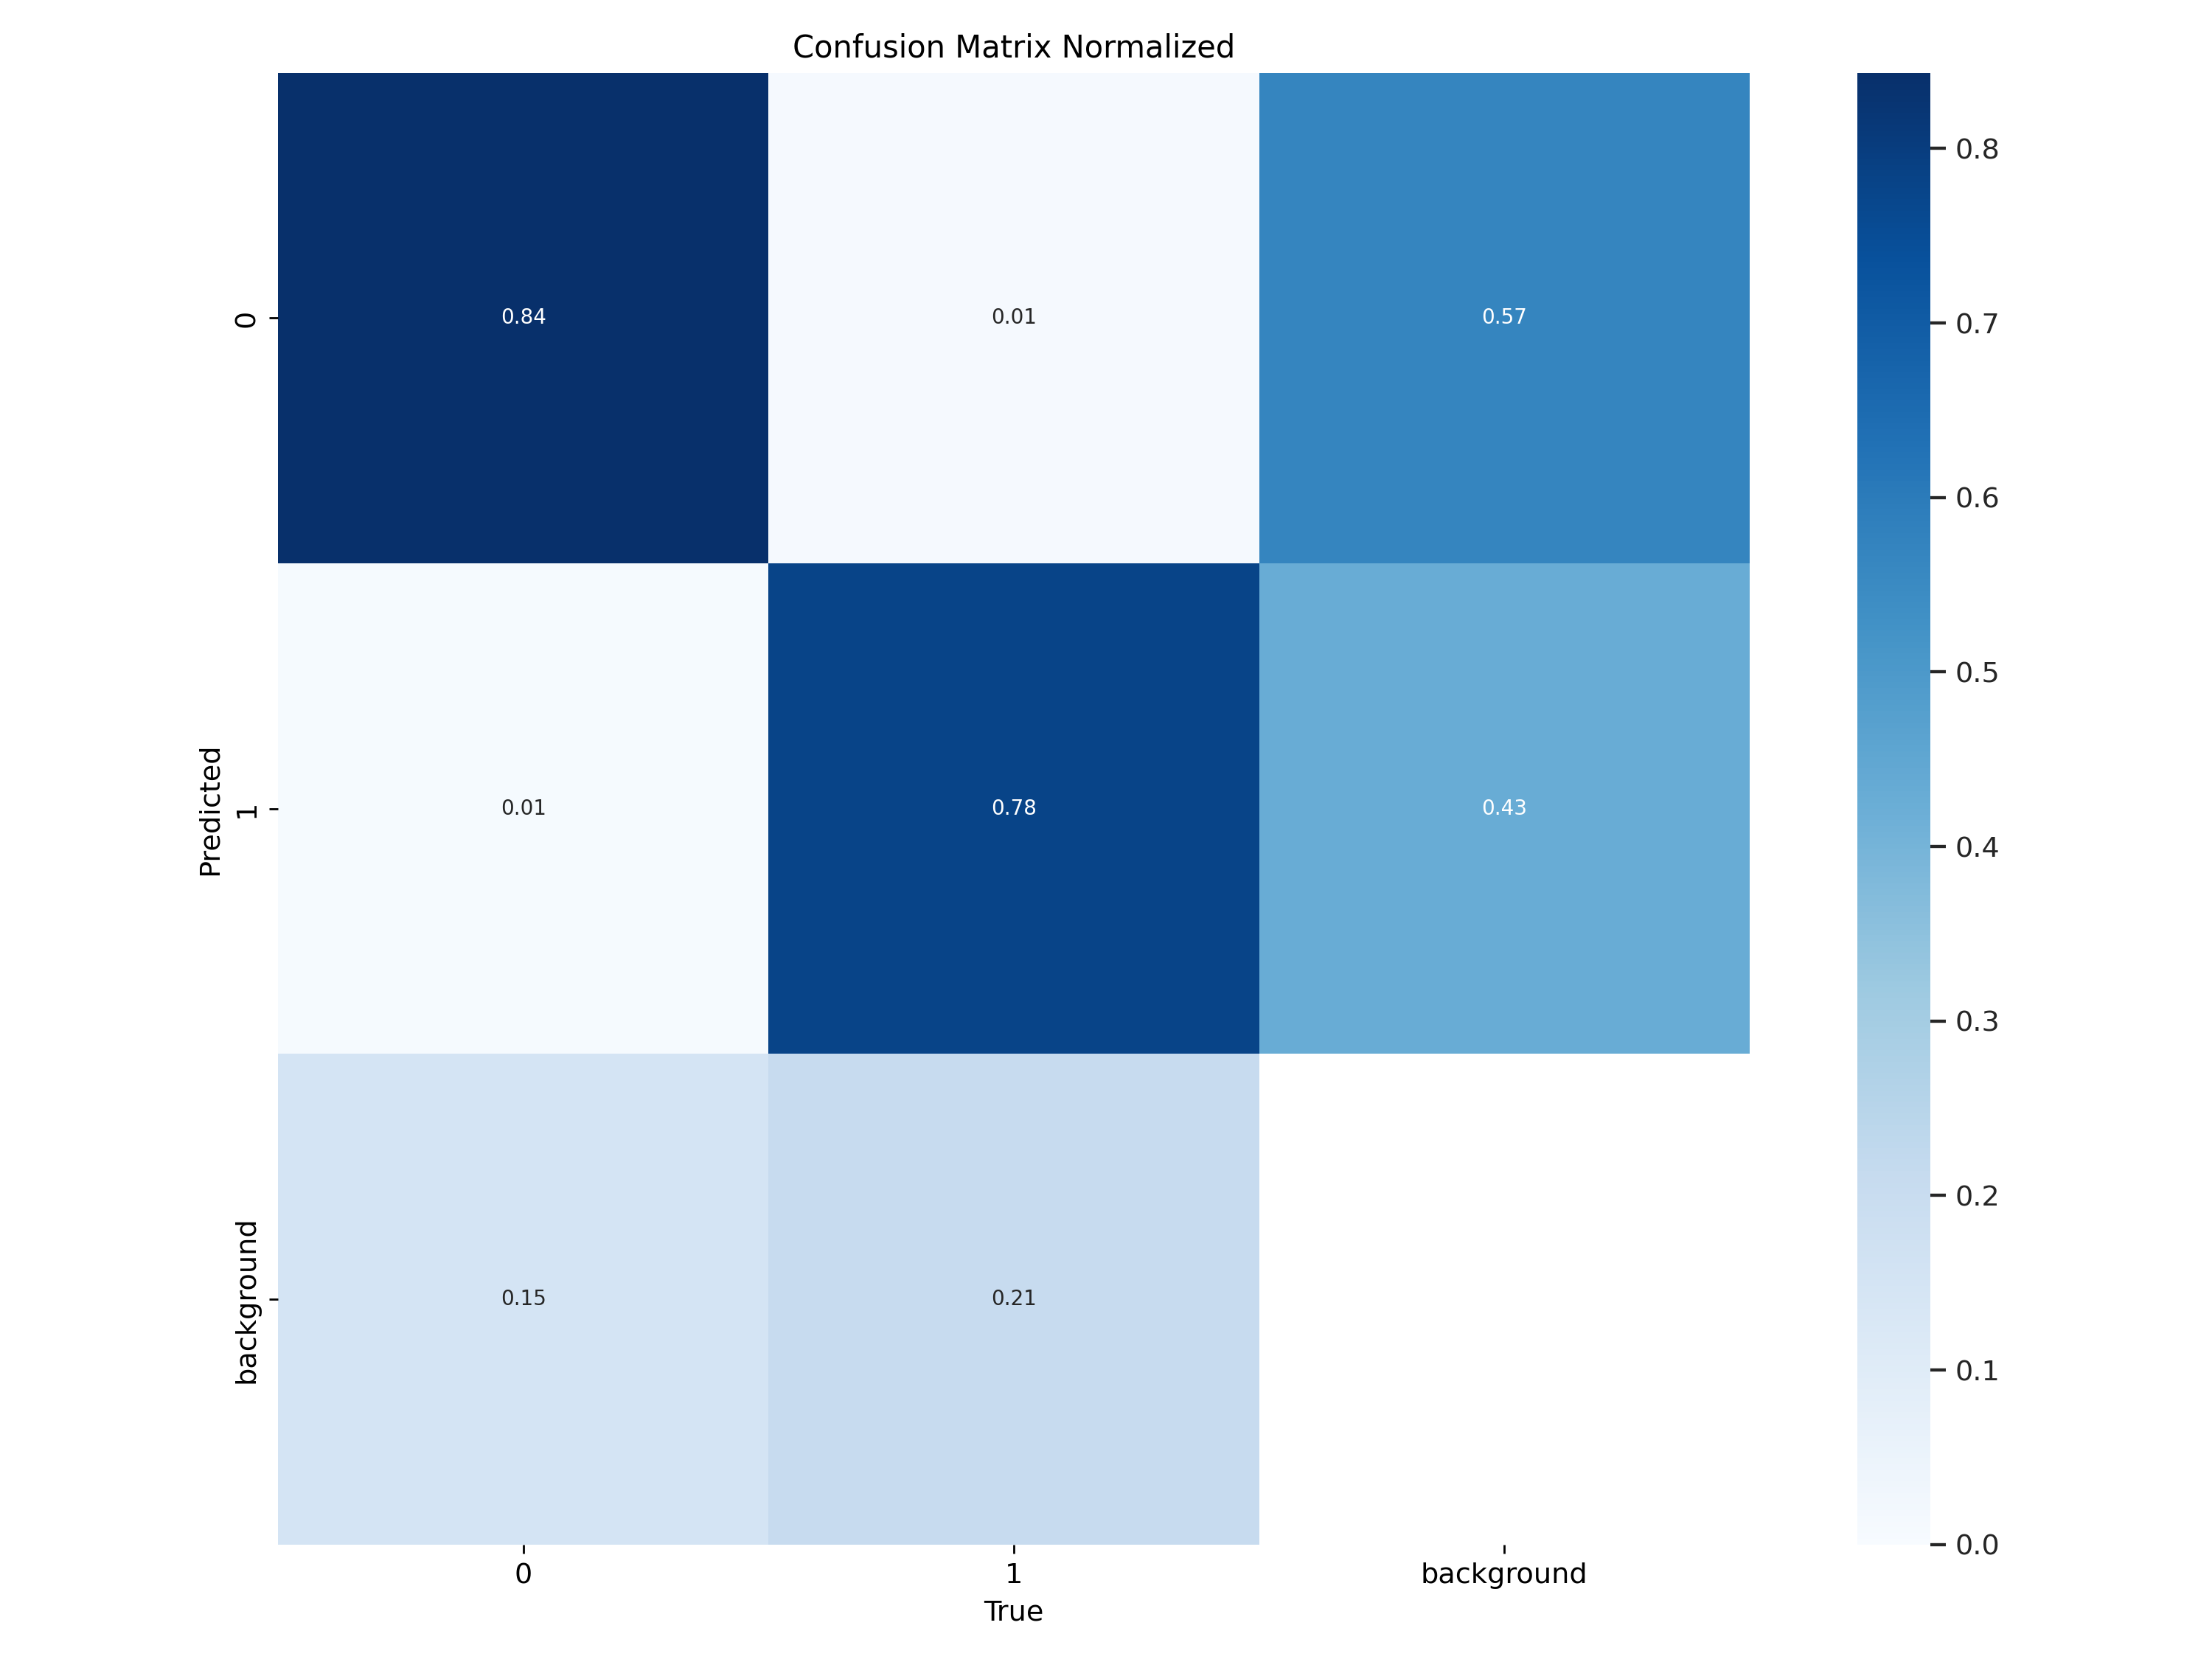

In [12]:
Image("/content/runs/detect/train/confusion_matrix_normalized.png", width=600)

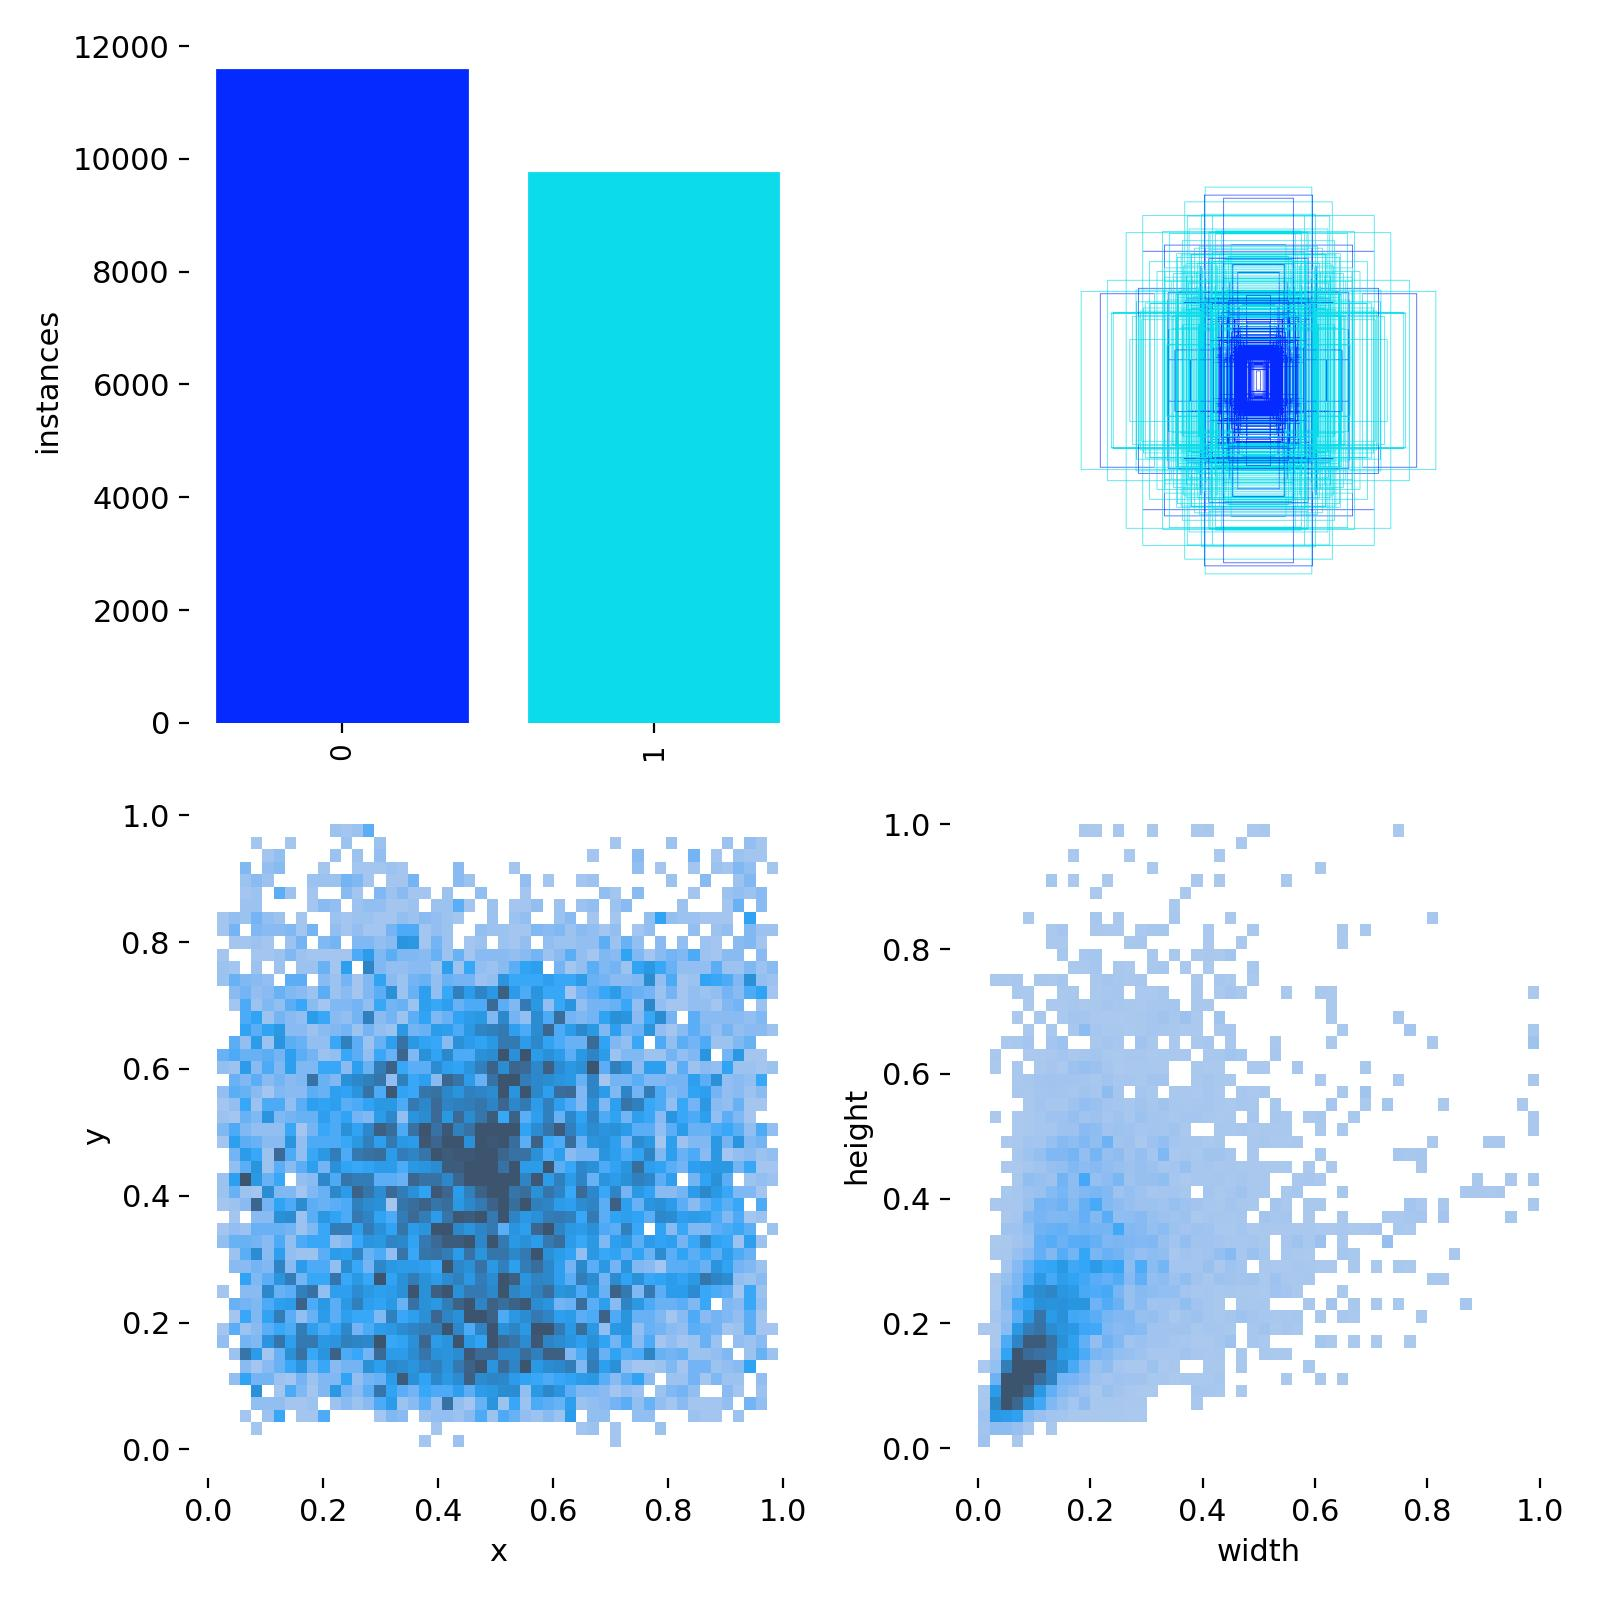

In [13]:
Image("/content/runs/detect/train/labels.jpg", width=600)

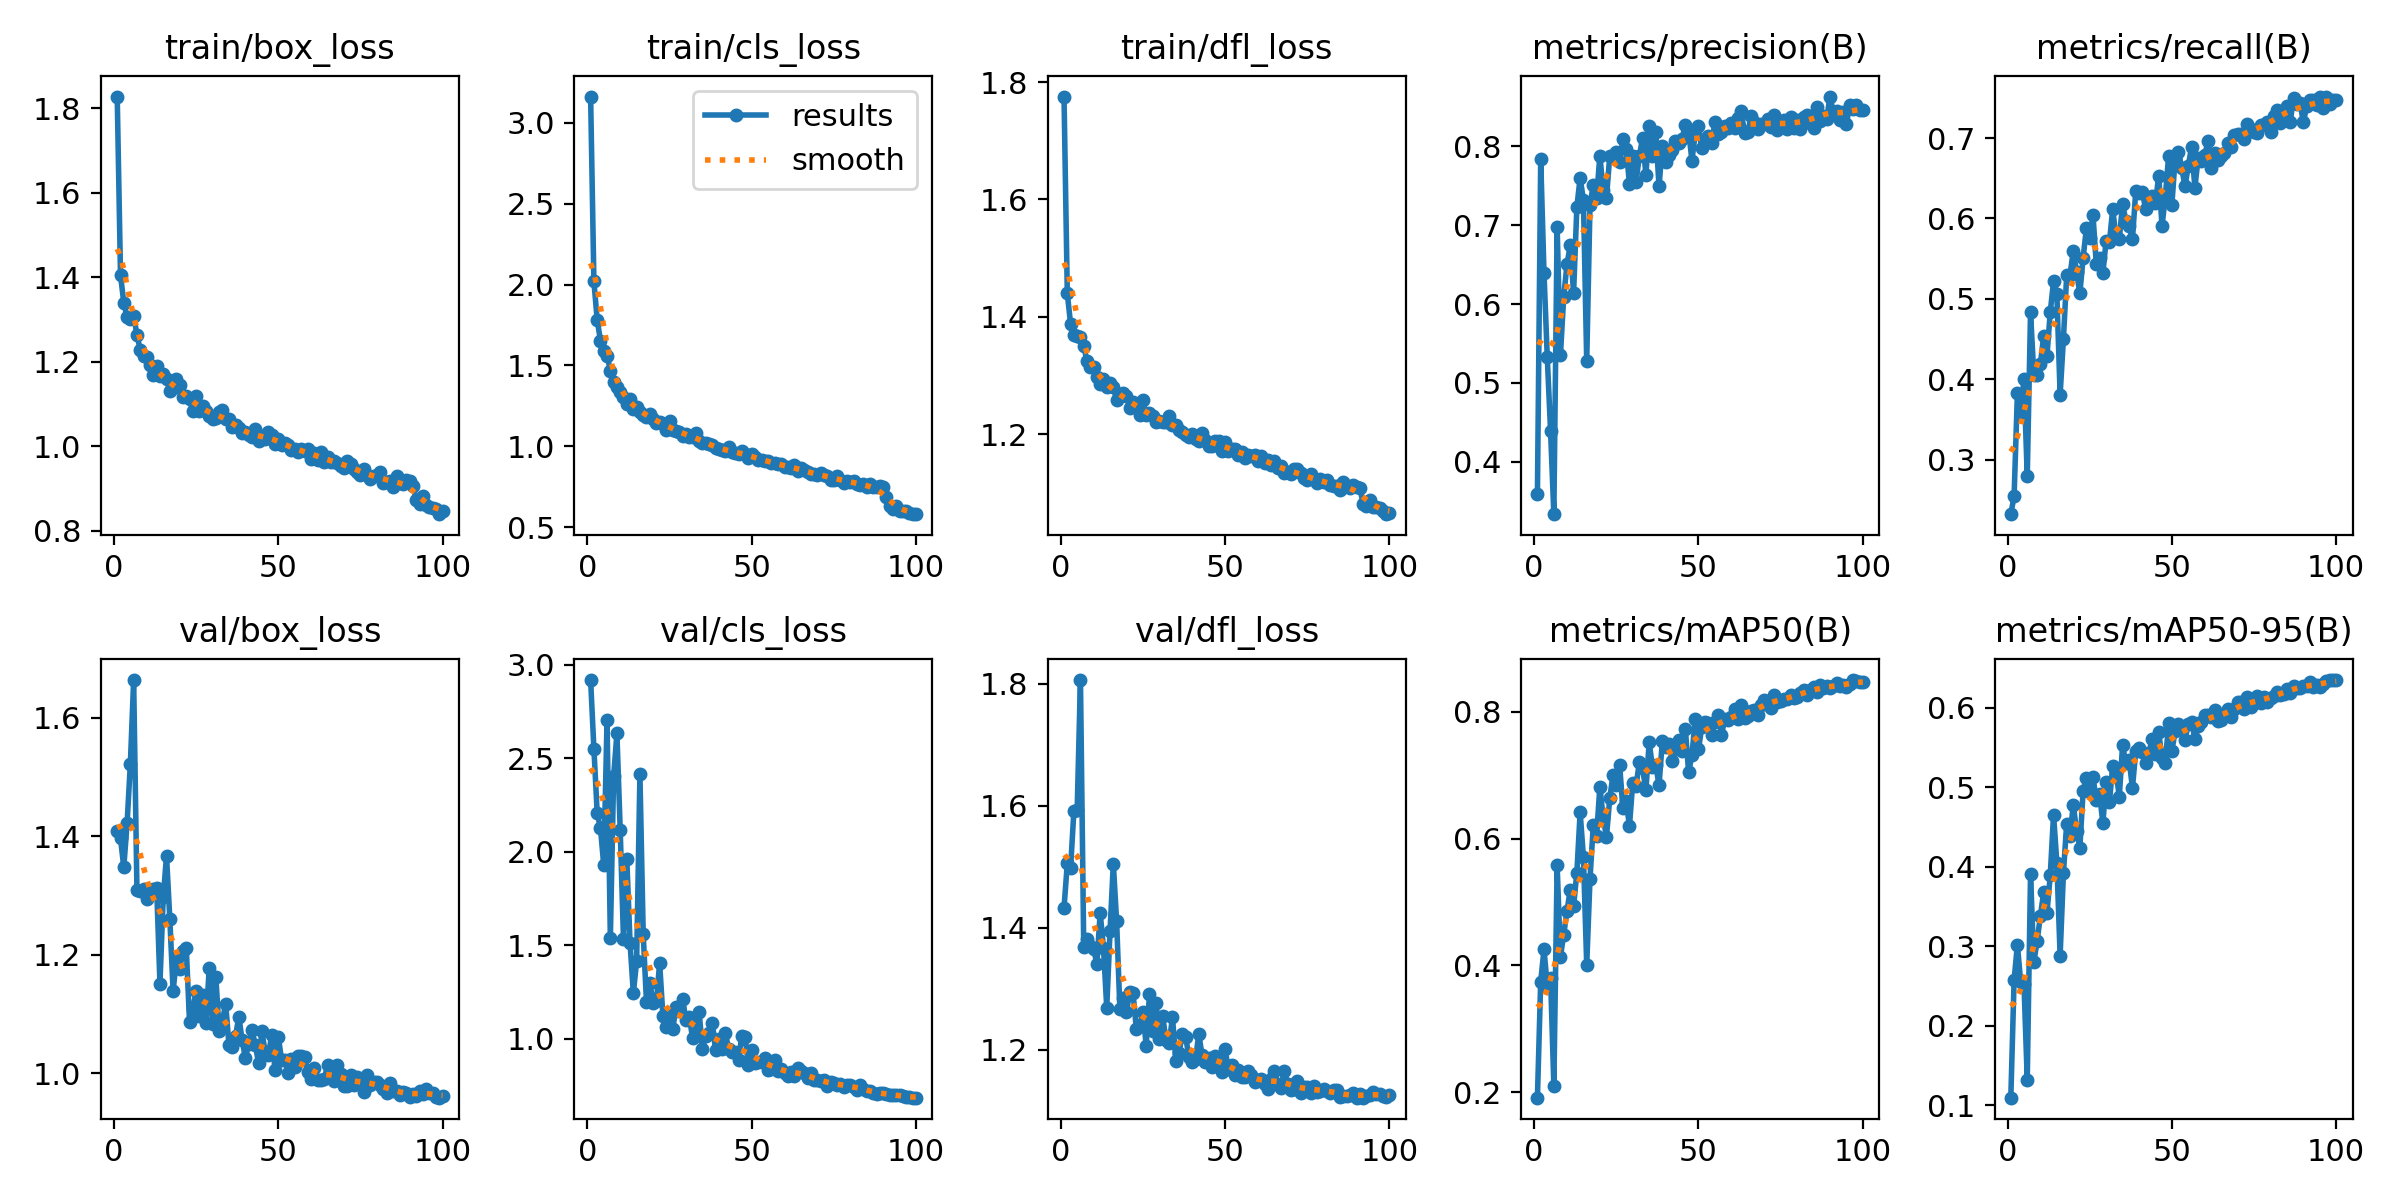

In [14]:
Image("/content/runs/detect/train/results.png", width=600)

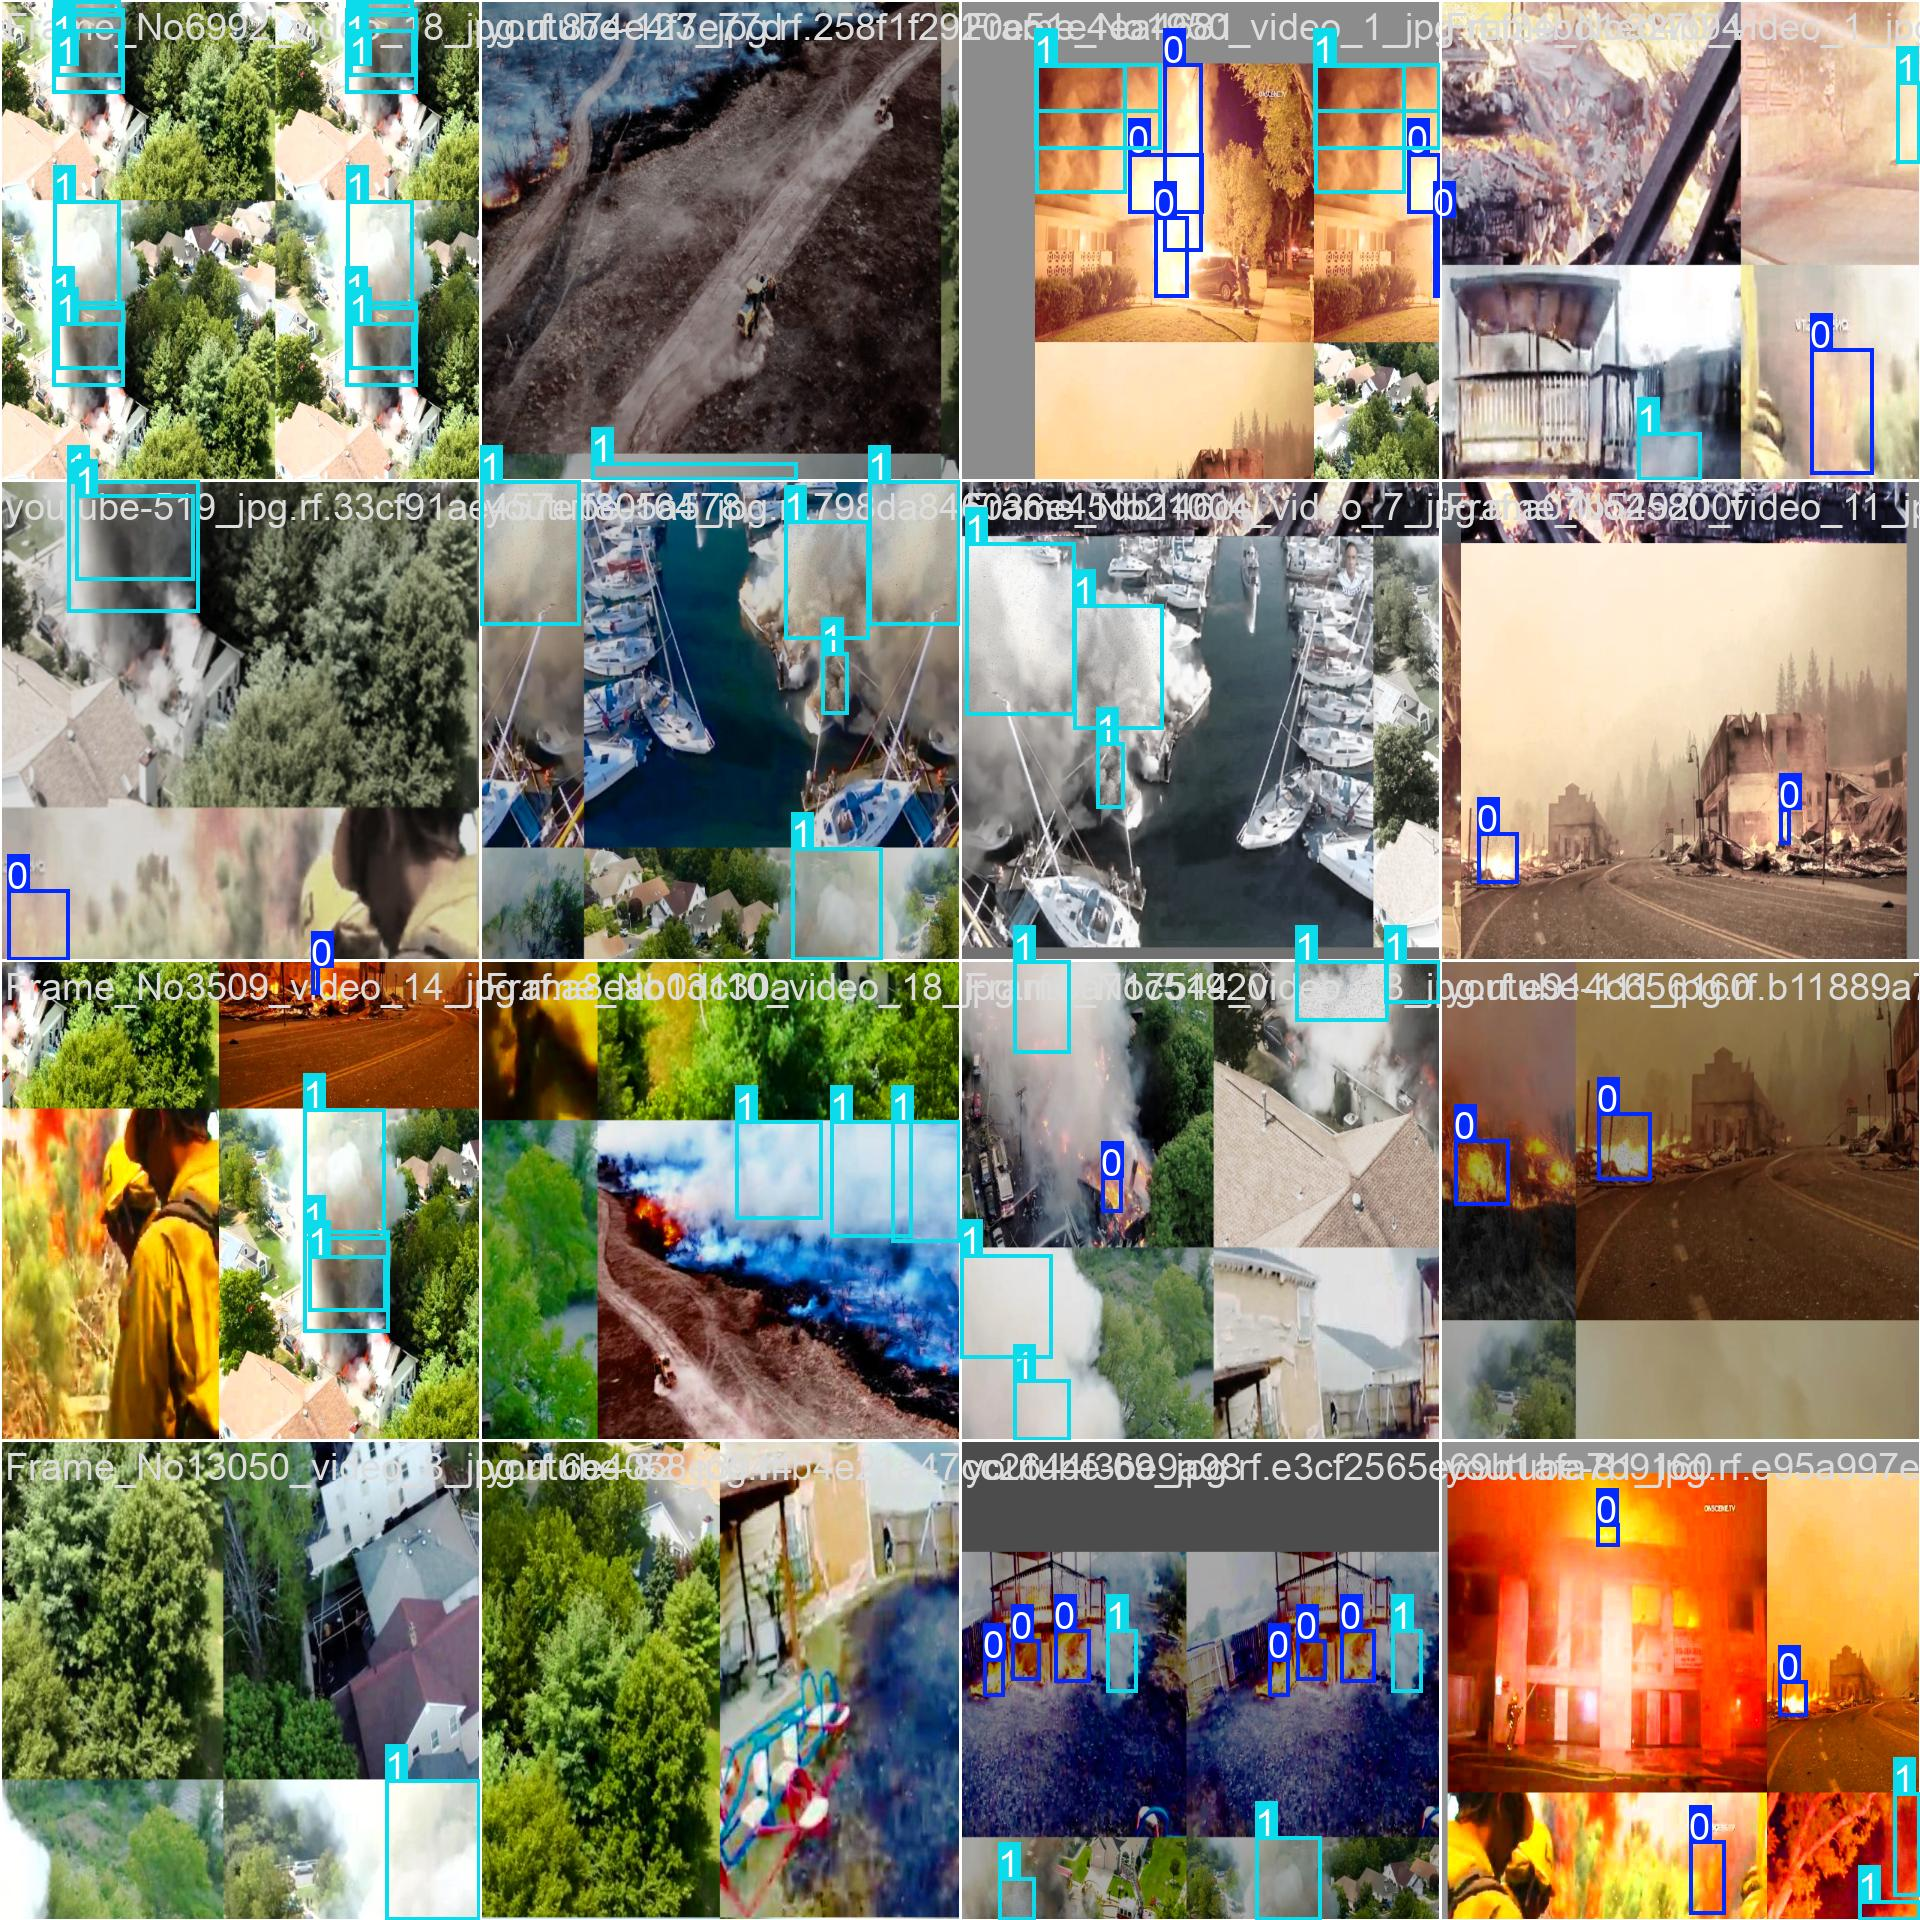

In [15]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

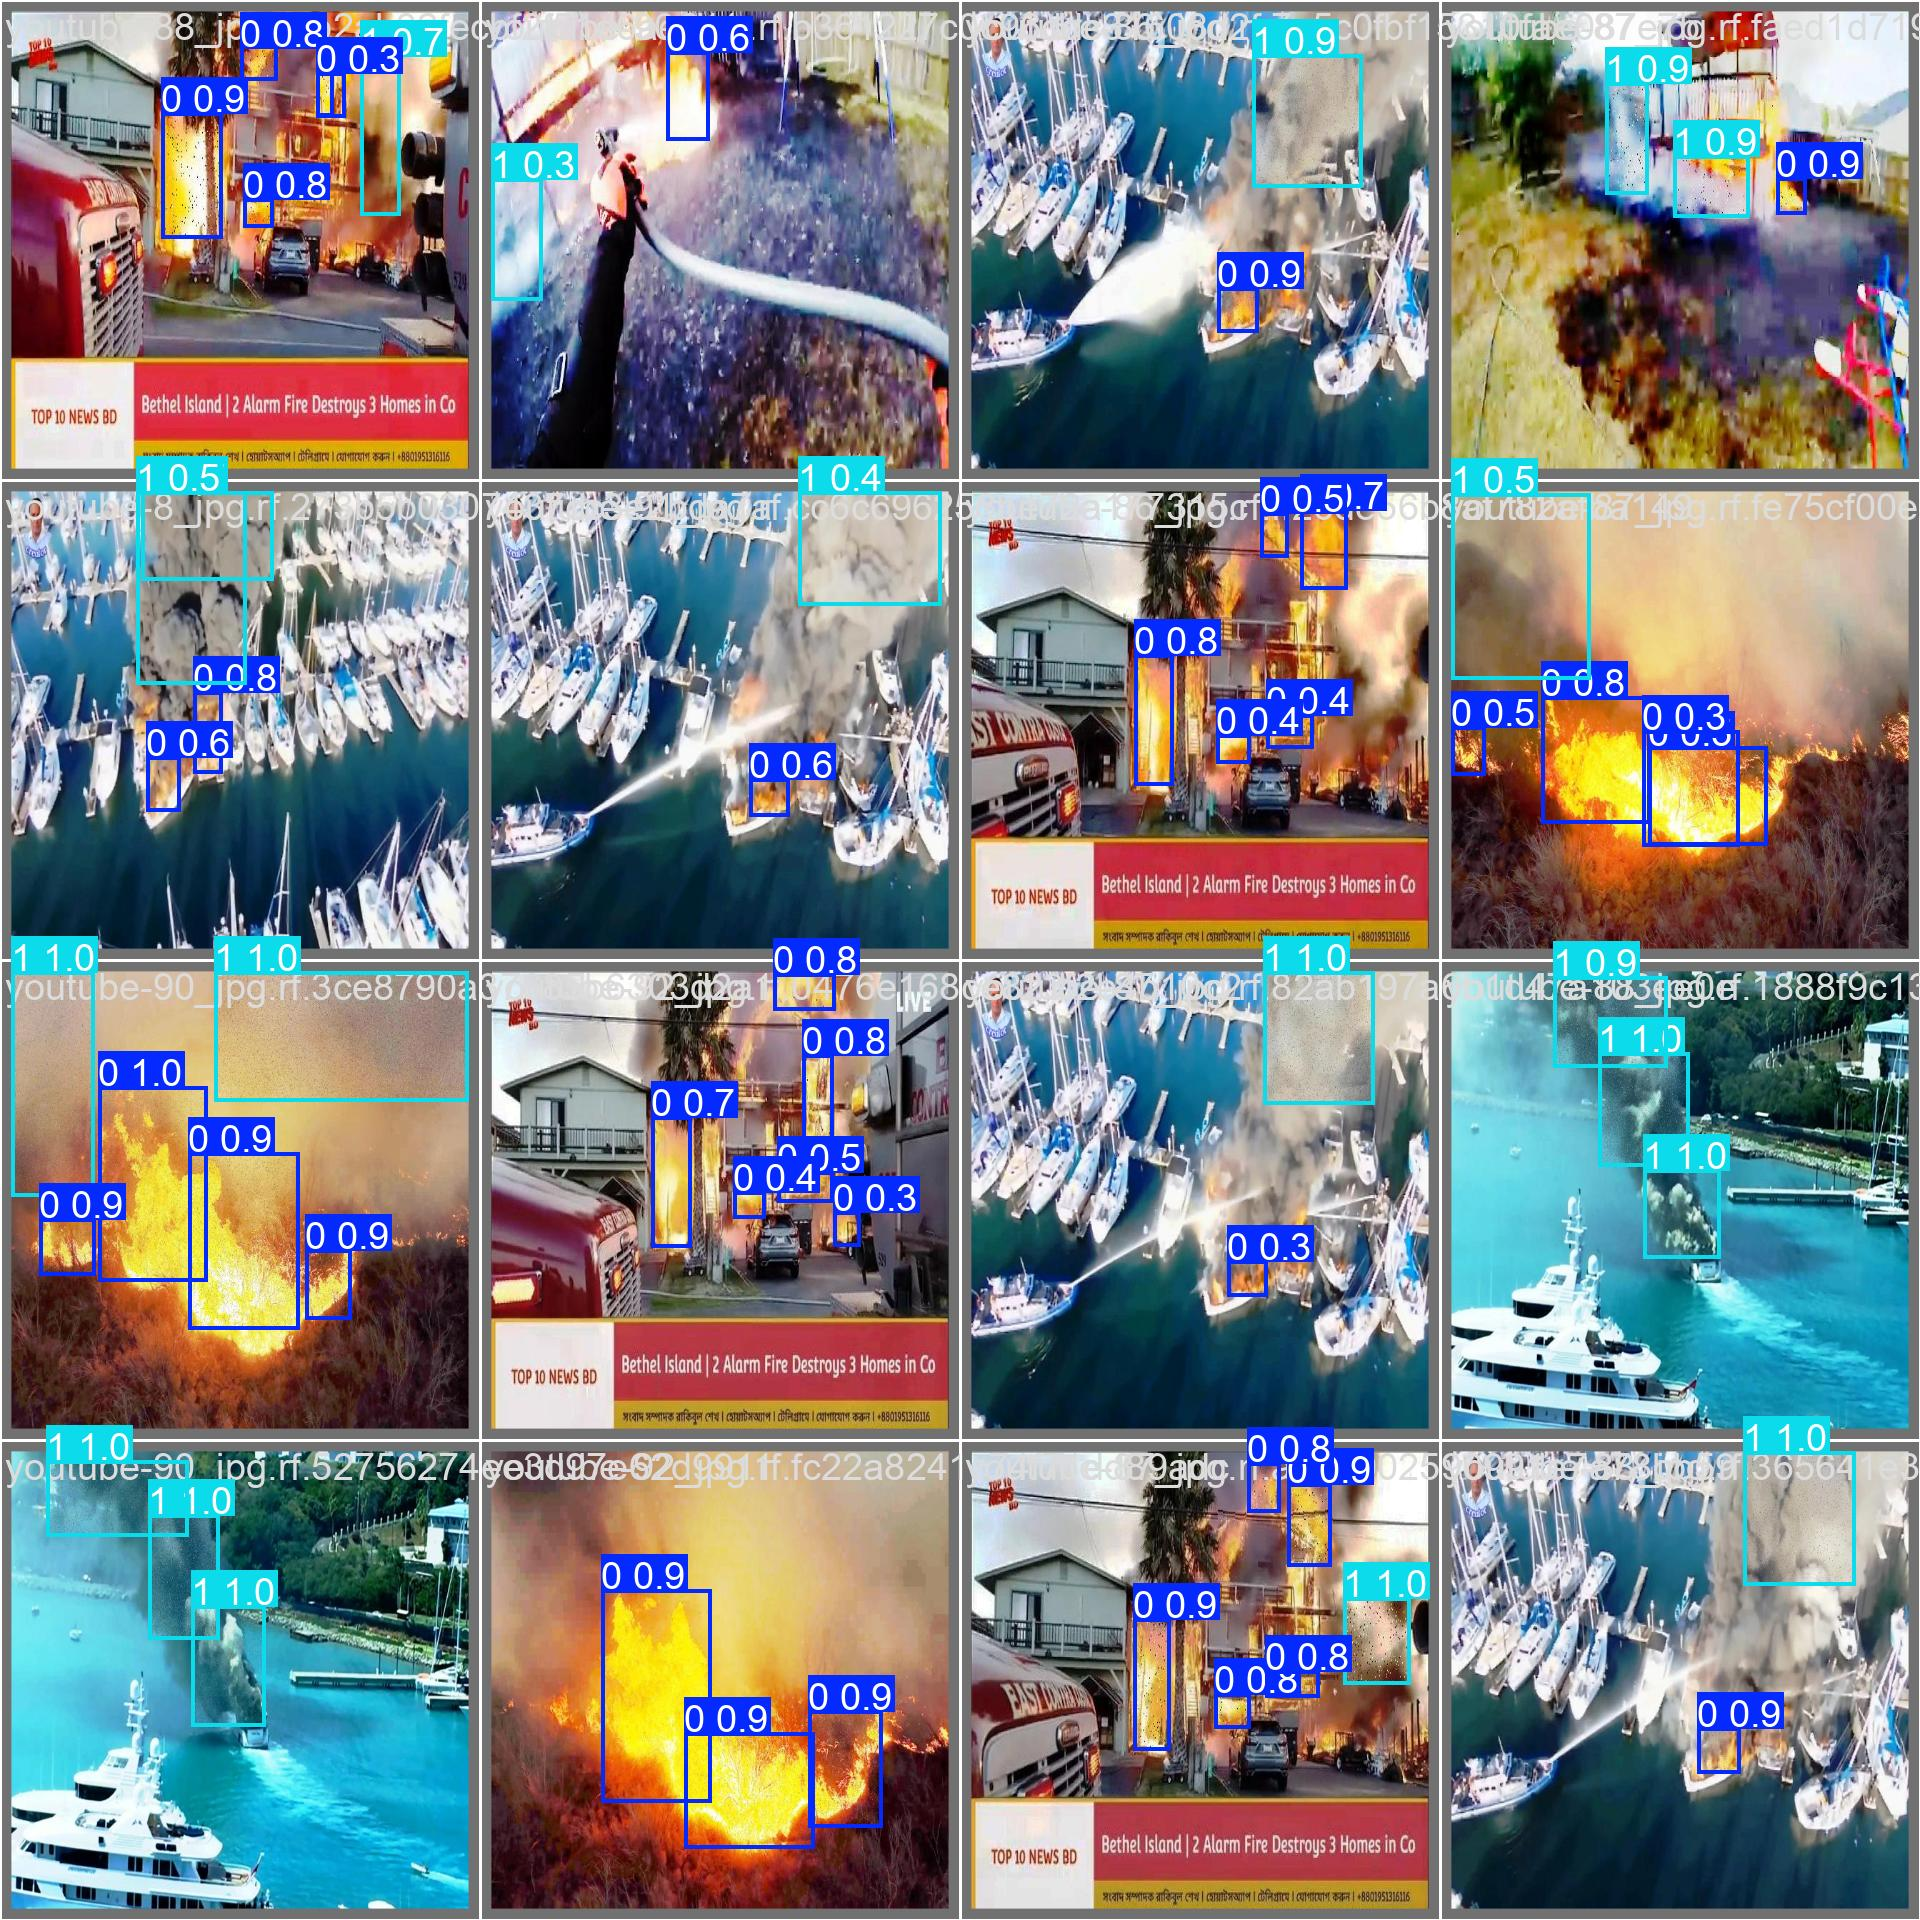

In [16]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

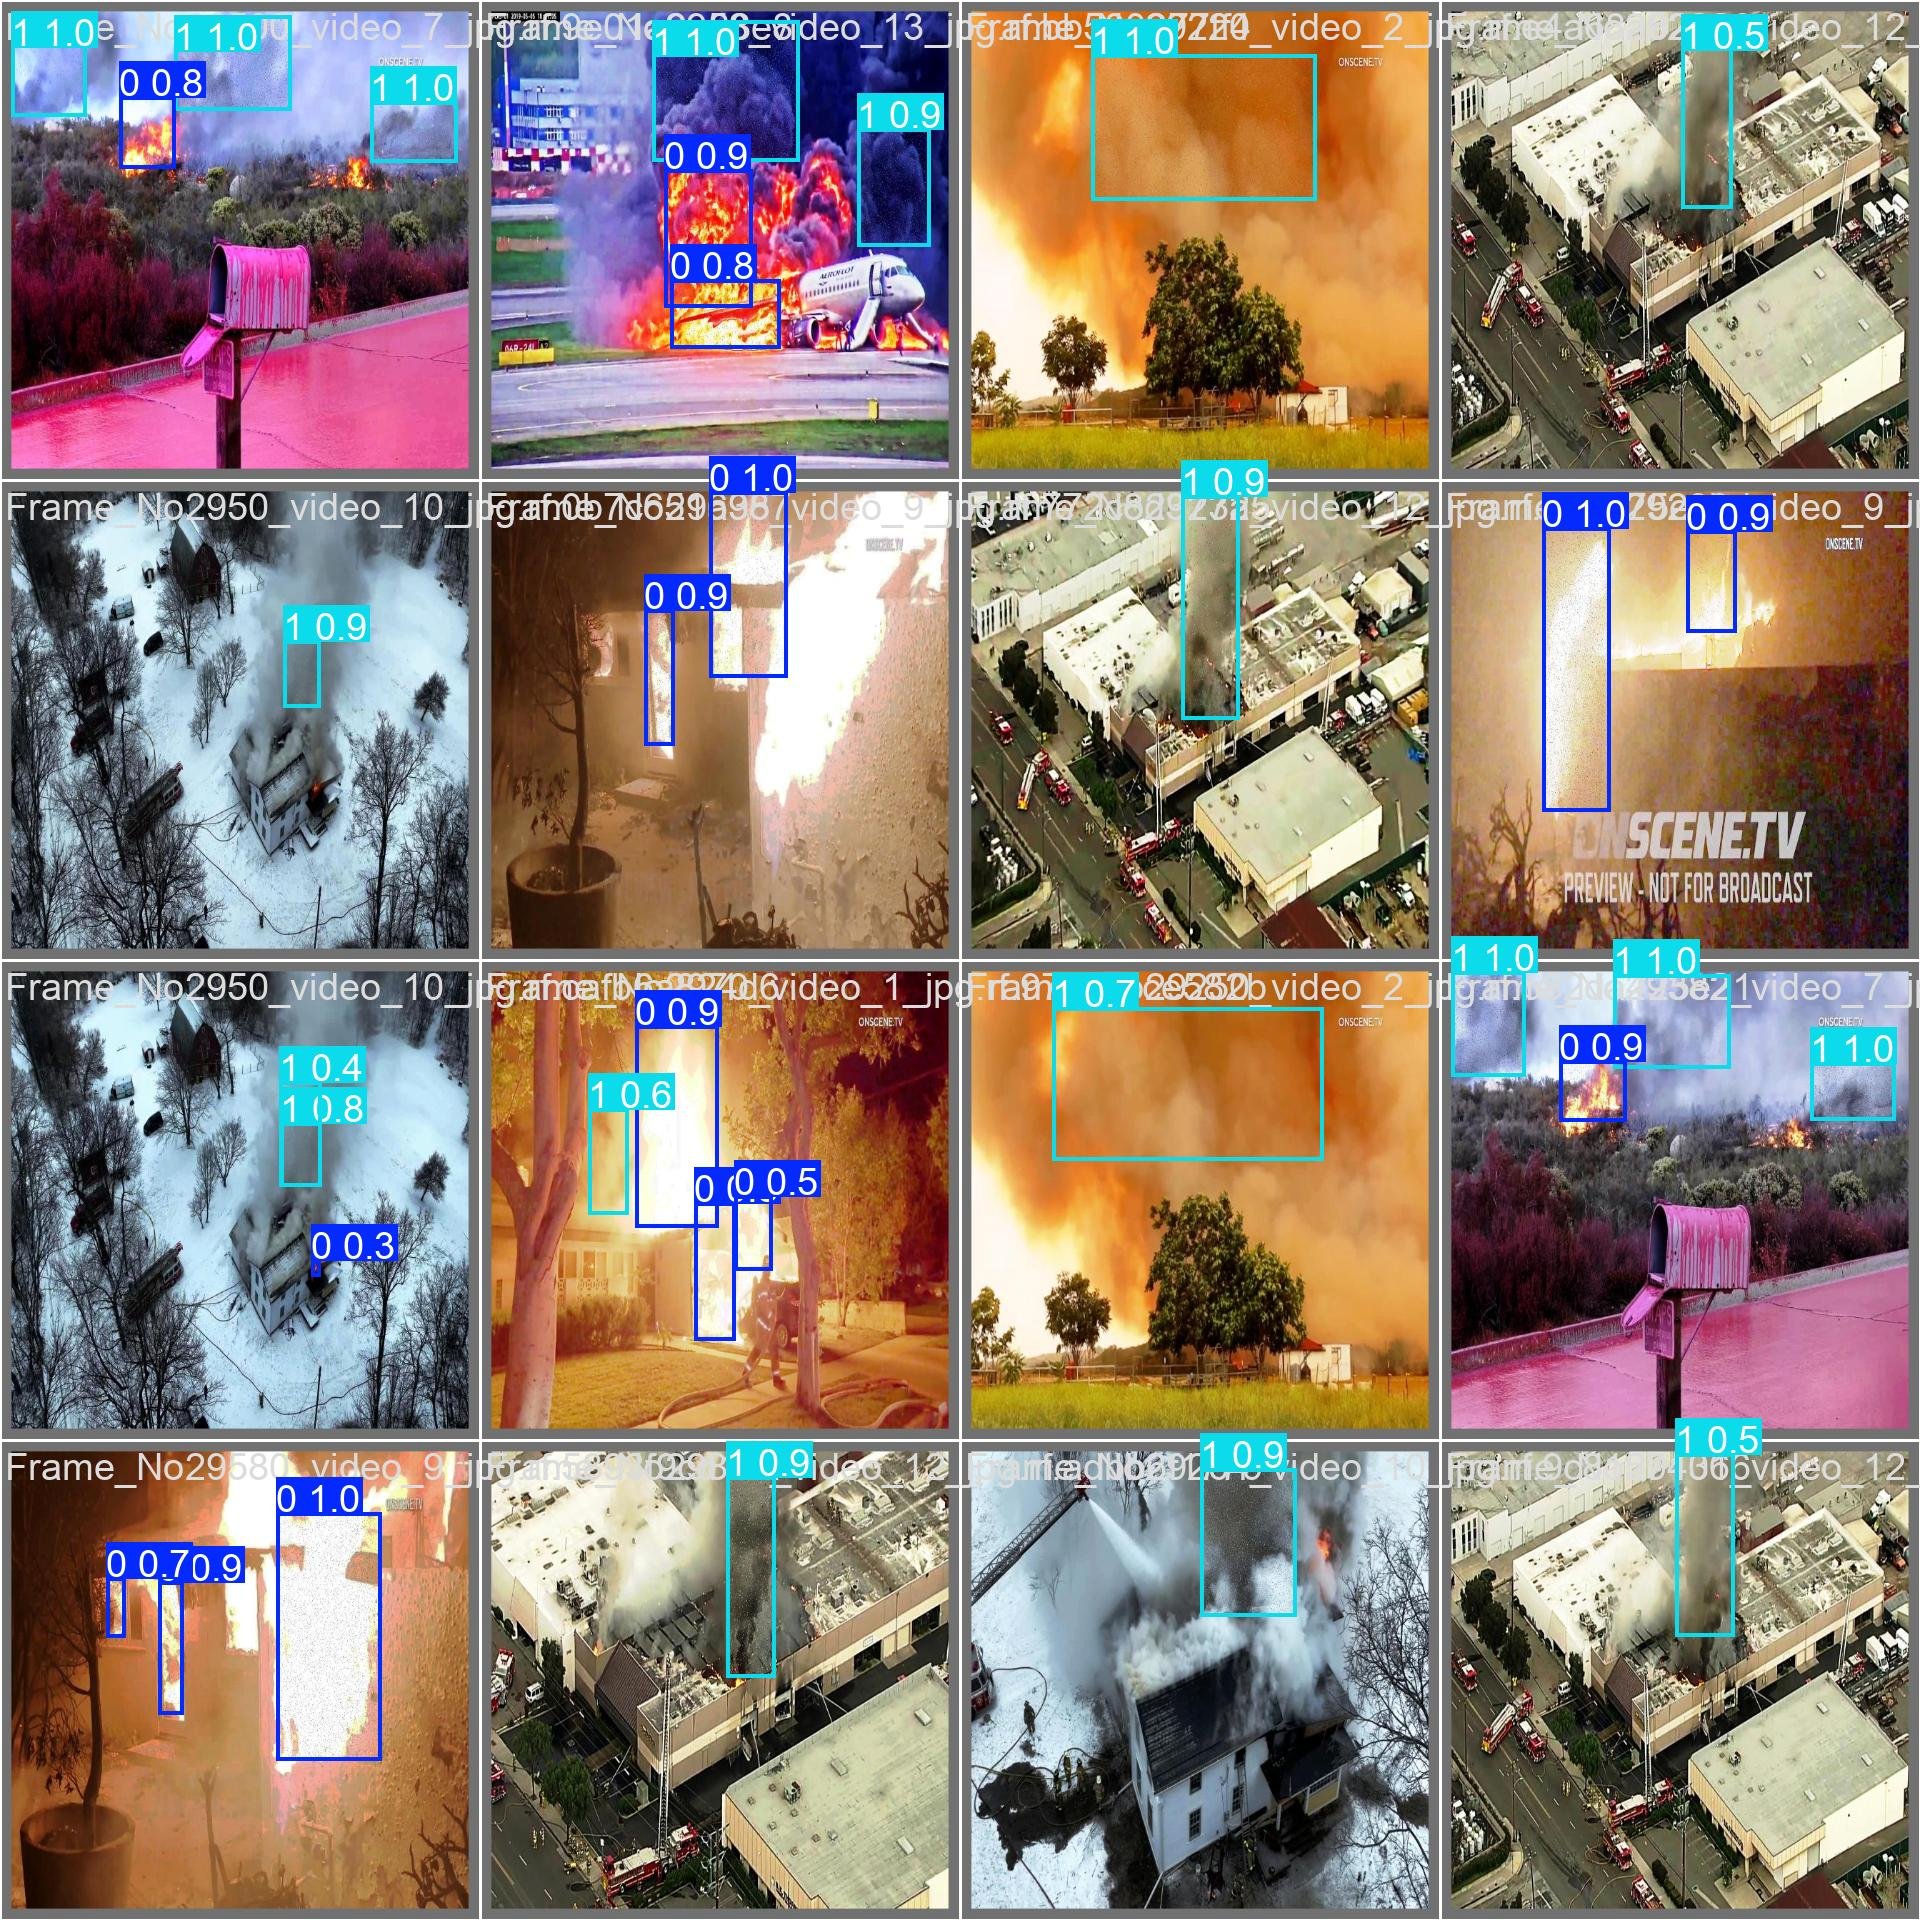

In [17]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

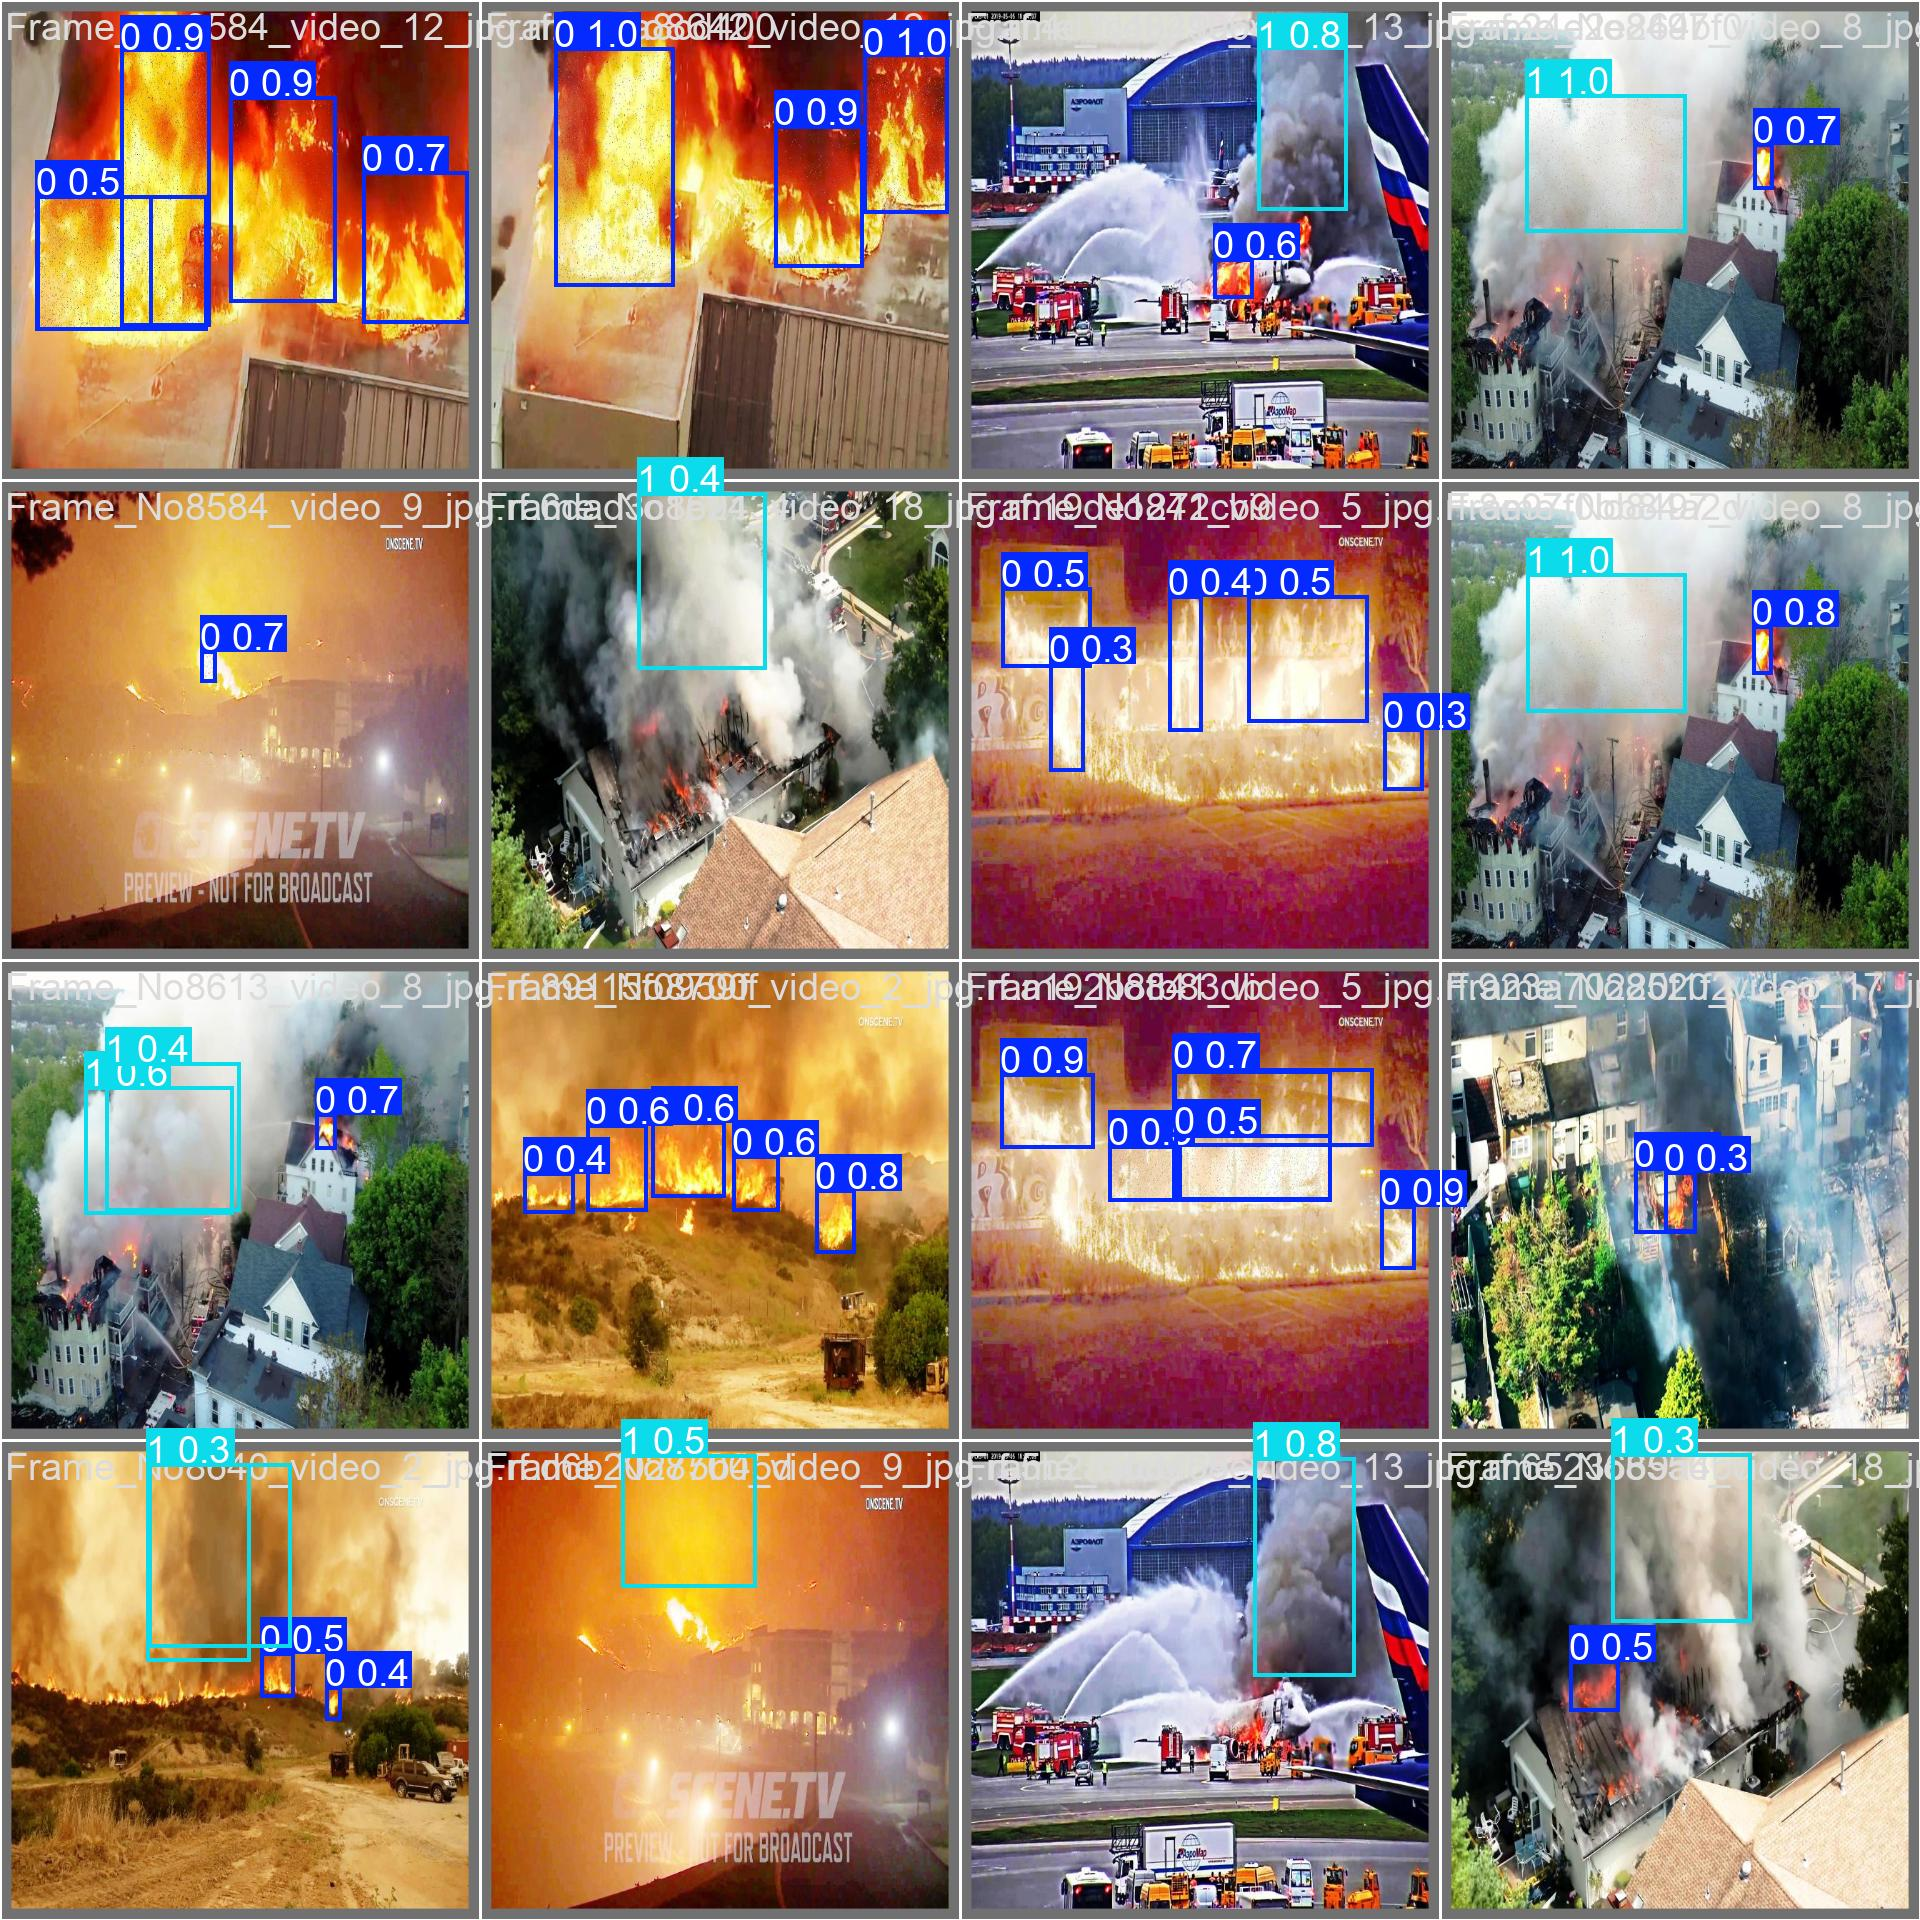

In [18]:
Image("/content/runs/detect/train/val_batch2_pred.jpg", width=600)

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
!mv /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/YOLO

**Step # 06 Download the Model Weights from the Google Drive**

In [ ]:
https://drive.google.com/file/d/1DcwpP9y4Nno6ak2GQDrykBmk3OkT47Yw/view?usp=drive_link

In [23]:
!gdown "https://drive.google.com/uc?id=https://drive.google.com/file/d/1DcwpP9y4Nno6ak2GQDrykBmk3OkT47Yw/view?usp=drive_link-CGY&confirm=t"

Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=https://drive.google.com/file/d/1DcwpP9y4Nno6ak2GQDrykBmk3OkT47Yw/view?usp=drive_link-CGY&confirm=t

but Gdown can't. Please check connections and permissions.


**Step # 07  Validate Fine-Tuned Model**

In [24]:
!yolo task=detect mode=val model="best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Fire_Smoke_Detection-1/valid/labels.cache... 1978 images, 0 backgrounds, 0 corrupt: 100% 1978/1978 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 124/124 [00:10<00:00, 11.55it/s]
                   all       1978       6227      0.852      0.743      0.848      0.635
                     0       1495       3371      0.854      0.775      0.865      0.611
                     1       1546       2856       0.85      0.711      0.831       0.66
Speed: 0.2ms preprocess, 0.9ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


**Step # 08 Inference with Custom Model on Images**

In [25]:
!yolo task=detect mode=predict model= best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/990 /content/Fire_Smoke_Detection-1/test/images/Frame_No10028_video_18_jpg.rf.aed7ae4f77f70cd448178b70ba63393c.jpg: 640x640 1 1, 11.6ms
image 2/990 /content/Fire_Smoke_Detection-1/test/images/Frame_No10092_video_8_jpg.rf.a6480ba61f6fe4d1834e9a8fa2f483cf.jpg: 640x640 1 0, 1 1, 10.2ms
image 3/990 /content/Fire_Smoke_Detection-1/test/images/Frame_No10110_video_2_jpg.rf.255e9d7603da6833aacbc1836a98f560.jpg: 640x640 3 0s, 2 1s, 9.7ms
image 4/990 /content/Fire_Smoke_Detection-1/test/images/Frame_No1015_video_14_jpg.rf.9a3415f10f8e08921b2b42e6717245be.jpg: 640x640 2 0s, 1 1, 9.3ms
image 5/990 /content/Fire_Smoke_Detection-1/test/images/Frame_No1015_video_15_jpg.rf.967f0eef3ff8cc4079f7eef32653a42c.jpg: 640x640 1 0, 1 1, 9.2ms
image 6/990 /content/Fire_Smoke_Detection-1/test/images/Frame_No1015_video_5_jpg.rf.2

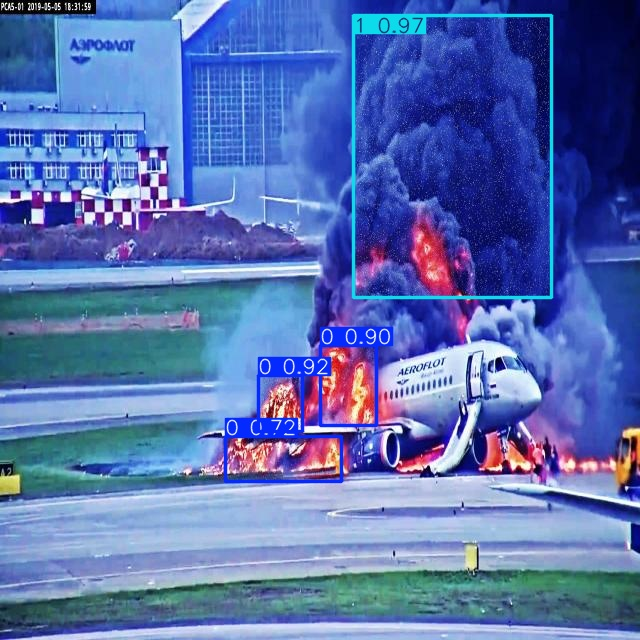

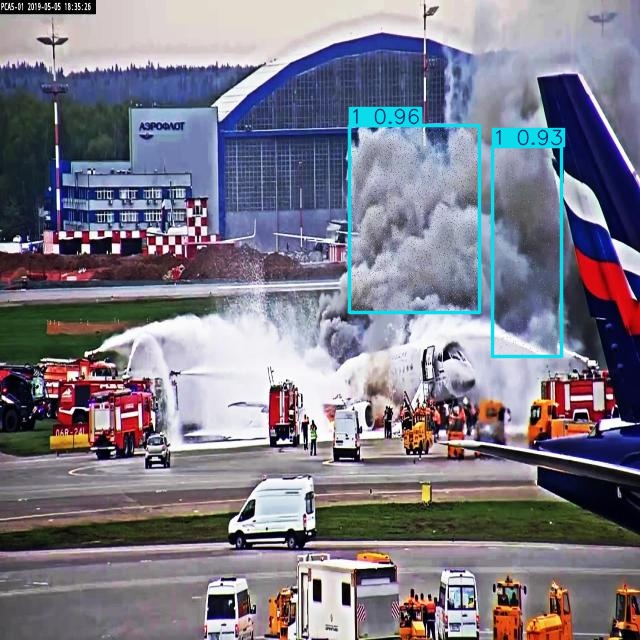

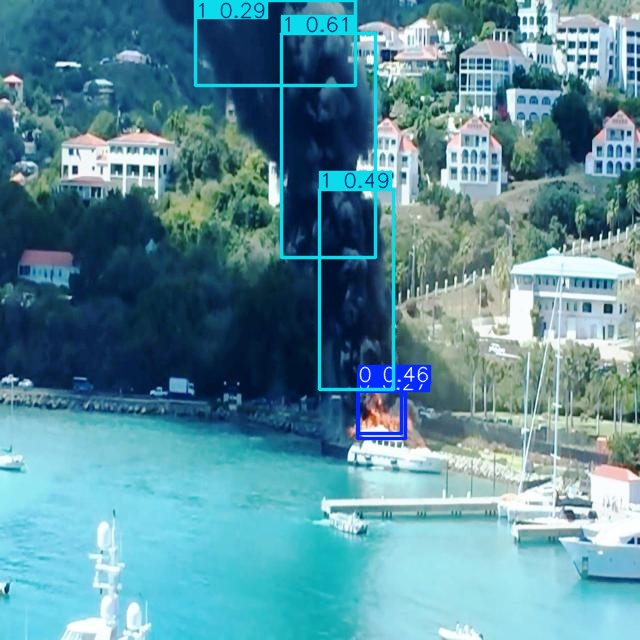

In [26]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

**Step # 08 Inference with Custom Model on Videos**

In [27]:
!yolo task=detect mode=predict model= best.pt conf=0.25 source="/content/Aerial Footage Shows Scale of Fires in Australia.mp4" save=True

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/1432) /content/Aerial Footage Shows Scale of Fires in Australia.mp4: 384x640 1 0, 58.5ms
video 1/1 (frame 2/1432) /content/Aerial Footage Shows Scale of Fires in Australia.mp4: 384x640 1 0, 10.4ms
video 1/1 (frame 3/1432) /content/Aerial Footage Shows Scale of Fires in Australia.mp4: 384x640 1 0, 9.7ms
video 1/1 (frame 4/1432) /content/Aerial Footage Shows Scale of Fires in Australia.mp4: 384x640 1 0, 1 1, 9.9ms
video 1/1 (frame 5/1432) /content/Aerial Footage Shows Scale of Fires in Australia.mp4: 384x640 1 0, 10.0ms
video 1/1 (frame 6/1432) /content/Aerial Footage Shows Scale of Fires in Australia.mp4: 384x640 1 0, 10.0ms
video 1/1 (frame 7/1432) /content/Aerial Footage Shows Scale of Fires in Australia.mp4: 384x640 1 0, 9.8ms
video 1/1 (frame 8/1432) /content/Aerial Footage Shows Scale of

In [39]:
!ffmpeg -i /content/runs/detect/predict2/Fire.avi fire_video.mp4


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [40]:
!yolo task=detect mode=predict model= best.pt conf=0.25 source="/content/Filming a Raging Forest Fire .mp4" save=True

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/4065) /content/Filming a Raging Forest Fire .mp4: 384x640 (no detections), 57.4ms
video 1/1 (frame 2/4065) /content/Filming a Raging Forest Fire .mp4: 384x640 (no detections), 9.9ms
video 1/1 (frame 3/4065) /content/Filming a Raging Forest Fire .mp4: 384x640 (no detections), 9.5ms
video 1/1 (frame 4/4065) /content/Filming a Raging Forest Fire .mp4: 384x640 (no detections), 9.6ms
video 1/1 (frame 5/4065) /content/Filming a Raging Forest Fire .mp4: 384x640 (no detections), 9.8ms
video 1/1 (frame 6/4065) /content/Filming a Raging Forest Fire .mp4: 384x640 (no detections), 9.4ms
video 1/1 (frame 7/4065) /content/Filming a Raging Forest Fire .mp4: 384x640 (no detections), 9.4ms
video 1/1 (frame 8/4065) /content/Filming a Raging Forest Fire .mp4: 384x640 (no detections), 9.6ms
video 1/1 (frame 9/4

In [42]:
!ffmpeg -i /content/runs/detect/predict3/fire2_video.avi fire2_video.mp4


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [43]:
!yolo task=detect mode=predict model= best.pt conf=0.25 source="/content/Forest Fire .mp4" save=True

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/3006) /content/Forest Fire .mp4: 384x640 (no detections), 57.2ms
video 1/1 (frame 2/3006) /content/Forest Fire .mp4: 384x640 (no detections), 10.0ms
video 1/1 (frame 3/3006) /content/Forest Fire .mp4: 384x640 (no detections), 9.4ms
video 1/1 (frame 4/3006) /content/Forest Fire .mp4: 384x640 (no detections), 10.4ms
video 1/1 (frame 5/3006) /content/Forest Fire .mp4: 384x640 (no detections), 9.5ms
video 1/1 (frame 6/3006) /content/Forest Fire .mp4: 384x640 (no detections), 9.5ms
video 1/1 (frame 7/3006) /content/Forest Fire .mp4: 384x640 (no detections), 9.3ms
video 1/1 (frame 8/3006) /content/Forest Fire .mp4: 384x640 (no detections), 10.1ms
video 1/1 (frame 9/3006) /content/Forest Fire .mp4: 384x640 (no detections), 9.5ms
video 1/1 (frame 10/3006) /content/Forest Fire .mp4: 384x640 (no detec

In [47]:
!ffmpeg -i /content/runs/detect/predict4/forestFire.avi fire3_video.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [48]:
!yolo task=detect mode=predict model= best.pt conf=0.25 source="/content/Wildfire_Forest_Fire .mp4" save=True

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/741) /content/Wildfire_Forest_Fire .mp4: 384x640 1 1, 58.4ms
video 1/1 (frame 2/741) /content/Wildfire_Forest_Fire .mp4: 384x640 1 1, 10.4ms
video 1/1 (frame 3/741) /content/Wildfire_Forest_Fire .mp4: 384x640 (no detections), 10.0ms
video 1/1 (frame 4/741) /content/Wildfire_Forest_Fire .mp4: 384x640 1 1, 10.0ms
video 1/1 (frame 5/741) /content/Wildfire_Forest_Fire .mp4: 384x640 1 1, 11.0ms
video 1/1 (frame 6/741) /content/Wildfire_Forest_Fire .mp4: 384x640 1 1, 10.2ms
video 1/1 (frame 7/741) /content/Wildfire_Forest_Fire .mp4: 384x640 1 1, 9.9ms
video 1/1 (frame 8/741) /content/Wildfire_Forest_Fire .mp4: 384x640 1 1, 9.8ms
video 1/1 (frame 9/741) /content/Wildfire_Forest_Fire .mp4: 384x640 1 1, 9.9ms
video 1/1 (frame 10/741) /content/Wildfire_Forest_Fire .mp4: 384x640 1 1, 9.8ms
video 1/1 (f

In [52]:
!ffmpeg -i /content/runs/detect/predict5/WildfireForestFire.avi fire4_video.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
n